In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
df_csv = pd.read_csv('./datasets/Lista_NPS_Positivo_V4.csv', sep=',')

/tmp/ipykernel_126140/948056464.py:1: DtypeWarning: Columns (20,86,87,91,103,105,119,120,121,122,123,125,126,127,130,131,132,133,136,137,138,141,142,143,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  df_csv = pd.read_csv('./datasets/Lista_NPS_Positivo_V4.csv', sep=',')


### Passo 1 - Utilizando a base inteira, calcule o target principal, formando uma nova coluna na base

In [3]:
df_csv['target'] = df_csv['nota'].apply(lambda nota: "Promotor" if nota >= 9 else ("Neutro" if nota >= 7 else "Detratores"))

In [4]:
df_csv.groupby('target').count()

db-id  control_id  invite_id  Tipo Produto  Grupo de Produto  \
target                                                                     
Detratores   2185        2185       2185          2185              2185   
Neutro       4738        4738       4738          4738              4738   
Promotor    18251       18251      18251         18251             18251   

            Familia do Produto  Modelo do Produto  Chassi do Produto  \
target                                                                 
Detratores                2185               2185               2185   
Neutro                    4738               4738               4738   
Promotor                 18251              18251              18251   

            Marca do Produto   nome  ...  \
target                               ...   
Detratores              2185   2185  ...   
Neutro                  4738   4738  ...   
Promotor               18251  18251  ...   

            ¿cómo evalúa la comodidad y la ergonomía de su <modelo> (considere, por ejemplo, la comodidad de los asientos, la visibilidad de la cabina, la comprensibilidad y la disposición de los controles)? (csat)  \
target                                                                                                                                                                                                                   
Detratores                                                 42                                                                                                                                                            
Neutro                                                    146                                                                                                                                                            
Promotor                                                  407                                                                                                                                                            

            ¿ha tenido algún problema con la confiabilidad/calidad en el que necesitaba comunicarse con su distribuidor? (like/dislike)  \
target                                                                                                                                    
Detratores                                                 41                                                                             
Neutro                                                    141                                                                             
Promotor                                                  386                                                                             

            ¿el problema que tuvo afectó su capacidad para trabajar o le impidió trabajar? (like/dislike)  \
target                                                                                                      
Detratores                                                 22                                               
Neutro                                                     71                                               
Promotor                                                  107                                               

            ¿hubo algún problema que requirió llevar el equipo <modelo> para mantenimiento? (like/dislike)  \
target                                                                                                       
Detratores                                                 39                                                
Neutro                                                    141                                                
Promotor                                                  383                                                

            ¿se ha resuelto el problema? (like/dislike)  \
target                                                    
Detratores                                     

### Passo 2 - Localizar a variável “mercado” e filtrar para reter apenas instâncias que são do brasil

In [5]:
df_filt_mercado = df_csv[df_csv['mercado'] == 'BRASIL']

In [6]:
df_filt_mercado.groupby('target').count()

db-id  control_id  invite_id  Tipo Produto  Grupo de Produto  \
target                                                                     
Detratores   2046        2046       2046          2046              2046   
Neutro       4427        4427       4427          4427              4427   
Promotor    17416       17416      17416         17416             17416   

            Familia do Produto  Modelo do Produto  Chassi do Produto  \
target                                                                 
Detratores                2046               2046               2046   
Neutro                    4427               4427               4427   
Promotor                 17416              17416              17416   

            Marca do Produto   nome  ...  \
target                               ...   
Detratores              2046   2046  ...   
Neutro                  4427   4427  ...   
Promotor               17416  17416  ...   

            ¿cómo evalúa la comodidad y la ergonomía de su <modelo> (considere, por ejemplo, la comodidad de los asientos, la visibilidad de la cabina, la comprensibilidad y la disposición de los controles)? (csat)  \
target                                                                                                                                                                                                                   
Detratores                                                  0                                                                                                                                                            
Neutro                                                      0                                                                                                                                                            
Promotor                                                    0                                                                                                                                                            

            ¿ha tenido algún problema con la confiabilidad/calidad en el que necesitaba comunicarse con su distribuidor? (like/dislike)  \
target                                                                                                                                    
Detratores                                                  0                                                                             
Neutro                                                      0                                                                             
Promotor                                                    0                                                                             

            ¿el problema que tuvo afectó su capacidad para trabajar o le impidió trabajar? (like/dislike)  \
target                                                                                                      
Detratores                                                  0                                               
Neutro                                                      0                                               
Promotor                                                    0                                               

            ¿hubo algún problema que requirió llevar el equipo <modelo> para mantenimiento? (like/dislike)  \
target                                                                                                       
Detratores                                                  0                                                
Neutro                                                      0                                                
Promotor                                                    0                                                

            ¿se ha resuelto el problema? (like/dislike)  \
target                                                    
Detratores                                     

### Passo 3 - Executar um comando de filtragem para trabalhar com o grupo que a sua equipe ficou encarregada

In [7]:
# Filtrar linhas onde a 5ª coluna (Grupo de Produto) é igual a "Grupo 2"
df_filt_grupo = df_filt_mercado[df_filt_mercado['Grupo de Produto'] == 'Grupo 2']

### Passo 4 - Fazer a volumetria de target, calculando para o seu grupo quantos promotores, neutros e detratores ficaram na base

In [8]:
df_filt_grupo.groupby('target').count()

db-id  control_id  invite_id  Tipo Produto  Grupo de Produto  \
target                                                                     
Detratores    267         267        267           267               267   
Neutro        521         521        521           521               521   
Promotor     1850        1850       1850          1850              1850   

            Familia do Produto  Modelo do Produto  Chassi do Produto  \
target                                                                 
Detratores                 267                267                267   
Neutro                     521                521                521   
Promotor                  1850               1850               1850   

            Marca do Produto  nome  ...  \
target                              ...   
Detratores               267   267  ...   
Neutro                   521   521  ...   
Promotor                1850  1850  ...   

            ¿cómo evalúa la comodidad y la ergonomía de su <modelo> (considere, por ejemplo, la comodidad de los asientos, la visibilidad de la cabina, la comprensibilidad y la disposición de los controles)? (csat)  \
target                                                                                                                                                                                                                   
Detratores                                                  0                                                                                                                                                            
Neutro                                                      0                                                                                                                                                            
Promotor                                                    0                                                                                                                                                            

            ¿ha tenido algún problema con la confiabilidad/calidad en el que necesitaba comunicarse con su distribuidor? (like/dislike)  \
target                                                                                                                                    
Detratores                                                  0                                                                             
Neutro                                                      0                                                                             
Promotor                                                    0                                                                             

            ¿el problema que tuvo afectó su capacidad para trabajar o le impidió trabajar? (like/dislike)  \
target                                                                                                      
Detratores                                                  0                                               
Neutro                                                      0                                               
Promotor                                                    0                                               

            ¿hubo algún problema que requirió llevar el equipo <modelo> para mantenimiento? (like/dislike)  \
target                                                                                                       
Detratores                                                  0                                                
Neutro                                                      0                                                
Promotor                                                    0                                                

            ¿se ha resuelto el problema? (like/dislike)  \
target                                                    
Detratores                                          

In [9]:
df_filt_grupo.target.value_counts(normalize=True)

target
Promotor      0.701289
Neutro        0.197498
Detratores    0.101213
Name: proportion, dtype: float64

### Passo 5 - Criar uma coluna chamada região, que irá corresponder as 5 regiões do país, baseado na informação da coluna “estado”

In [10]:
# Dicionário de referência para atribuir regiões com base nas siglas dos estados
regioes = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

# Função para obter a região com base na sigla do estado
def obter_regiao(estado):
    for regiao, estados in regioes.items():
        if estado in estados:
            return regiao
    return "Fora do Mapa"  # Define "Fora do Mapa" para estados não encontrados em nenhuma região

# Aplicar a função para criar a coluna 'regiao' no DataFrame df_filt_grupo
df_filt_grupo['regiao'] = df_filt_grupo['estado'].apply(obter_regiao)

/tmp/ipykernel_126140/2412432713.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt_grupo['regiao'] = df_filt_grupo['estado'].apply(obter_regiao)


### Passo 6 - Criar uma coluna chamada safra, baseada na variável “data_resposta”, capturando apenas o ano da resposta.

In [11]:
# Converter a coluna 'data_resposta' para o formato datetime, caso ainda não esteja
df_filt_grupo['data_resposta'] = pd.to_datetime(df_filt_grupo['data_resposta'], format='%d/%m/%Y %H:%M:%S')

# Criar a coluna 'Safra' baseada no ano de 'data_resposta'
df_filt_grupo['Safra'] = df_filt_grupo['data_resposta'].dt.year

/tmp/ipykernel_126140/933799823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt_grupo['data_resposta'] = pd.to_datetime(df_filt_grupo['data_resposta'], format='%d/%m/%Y %H:%M:%S')
/tmp/ipykernel_126140/933799823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt_grupo['Safra'] = df_filt_grupo['data_resposta'].dt.year


### Passo 7 -	Calcular a volumetria do target Safrada (pelo ano) para a base total, fazer a mesma volumetria para cada região do país e para cada um dos quatro períodos de pesquisa baseado na coluna “Período de Pesquisa”

In [ ]:
import pandas as pd

# Total geral da base filtrada para referência
total_geral = len(df_filt_grupo)

# Inicializar dicionários para armazenar as volumetrias
volumetria_por_regiao_safra = {}
volumetria_por_periodo_safra = {}

# Obter listas únicas de safras, regiões e períodos de pesquisa
safras = df_filt_grupo['Safra'].unique()
regioes = df_filt_grupo['regiao'].unique()
periodos = df_filt_grupo['Periodo de Pesquisa'].unique()

# Calcular a volumetria por cada região e safra
for safra in safras:
    df_safra = df_filt_grupo[df_filt_grupo['Safra'] == safra]
    total_safra = len(df_safra)  # Total de registros para a safra atual

    # Dicionário para armazenar volumetria por região para a safra atual
    volumetria_por_regiao_safra[safra] = {}

    for regiao in regioes:
        df_regiao_safra = df_safra[df_safra['regiao'] == regiao]
        total_regiao_safra = len(df_regiao_safra)

        # Armazenar o valor absoluto e percentual para cada região e safra
        volumetria_por_regiao_safra[safra][regiao] = {
            "Total": total_regiao_safra,
            "Percentual": (total_regiao_safra / total_safra) * 100 if total_safra else 0
        }

# Calcular a volumetria por cada período de pesquisa e safra
for safra in safras:
    df_safra = df_filt_grupo[df_filt_grupo['Safra'] == safra]

    # Dicionário para armazenar volumetria por período de pesquisa para a safra atual
    volumetria_por_periodo_safra[safra] = {}

    for periodo in periodos:
        df_periodo_safra = df_safra[df_safra['Periodo de Pesquisa'] == periodo]
        total_periodo_safra = len(df_periodo_safra)

        # Armazenar o valor absoluto e percentual para cada período e safra
        volumetria_por_periodo_safra[safra][periodo] = {
            "Total": total_periodo_safra,
            "Percentual": (total_periodo_safra / total_safra) * 100 if total_safra else 0
        }

# Calcular o total de registros somando todas as safras para verificação de coerência
total_por_safras = sum([len(df_filt_grupo[df_filt_grupo['Safra'] == safra]) for safra in safras])

# Verificação de coerência
print("Verificação de total:")
print(f"Total Geral: {total_geral}")
print(f"Soma das Safras: {total_por_safras}")
print("Totais são coerentes!" if total_geral == total_por_safras else "Incoerência nos totais.")

# Exibir os resultados da volumetria por região e safra
print("\nVolumetria por Região e Safra:")
for safra, dados in volumetria_por_regiao_safra.items():
    print(f"\nSafra {safra}:")
    for regiao, valores in dados.items():
        print(f"  Região {regiao}: {valores['Total']} registros ({valores['Percentual']:.2f}%)")

# Exibir os resultados da volumetria por período de pesquisa e safra
print("\nVolumetria por Período de Pesquisa e Safra:")
for safra, dados in volumetria_por_periodo_safra.items():
    print(f"\nSafra {safra}:")
    for periodo, valores in dados.items():
        print(f"  Período {periodo}: {valores['Total']} registros ({valores['Percentual']:.2f}%)")

In [ ]:
import pandas as pd

# Total geral da base filtrada para referência
total_geral = len(df_filt_grupo)

# Inicializar dicionários para armazenar as volumetrias
volumetria_por_regiao = {}
volumetria_por_periodo = {}

# Obter listas únicas de safras, regiões e períodos de pesquisa
safras = df_filt_grupo['Safra'].unique()
regioes = df_filt_grupo['regiao'].unique()
periodos = df_filt_grupo['Periodo de Pesquisa'].unique()

# Calcular a volumetria organizada por cada região e suas safras
for regiao in regioes:
    # Filtrar registros apenas da região atual
    df_regiao = df_filt_grupo[df_filt_grupo['regiao'] == regiao]
    total_regiao = len(df_regiao)  # Total de registros para a região atual

    # Dicionário para armazenar volumetria por safra para a região atual
    volumetria_por_regiao[regiao] = {}

    for safra in safras:
        df_regiao_safra = df_regiao[df_regiao['Safra'] == safra]
        total_regiao_safra = len(df_regiao_safra)

        # Armazenar o valor absoluto e percentual para cada safra dentro da região
        volumetria_por_regiao[regiao][safra] = {
            "Total": total_regiao_safra,
            "Percentual": (total_regiao_safra / total_regiao) * 100 if total_regiao else 0
        }

# Calcular a volumetria organizada por cada período de pesquisa e suas safras
for periodo in periodos:
    # Filtrar registros apenas do período de pesquisa atual
    df_periodo = df_filt_grupo[df_filt_grupo['Periodo de Pesquisa'] == periodo]
    total_periodo = len(df_periodo)  # Total de registros para o período atual

    # Dicionário para armazenar volumetria por safra para o período de pesquisa atual
    volumetria_por_periodo[periodo] = {}

    for safra in safras:
        df_periodo_safra = df_periodo[df_periodo['Safra'] == safra]
        total_periodo_safra = len(df_periodo_safra)

        # Armazenar o valor absoluto e percentual para cada safra dentro do período de pesquisa
        volumetria_por_periodo[periodo][safra] = {
            "Total": total_periodo_safra,
            "Percentual": (total_periodo_safra / total_periodo) * 100 if total_periodo else 0
        }

# Calcular o total de registros somando todas as safras para verificação de coerência
total_por_safras = sum([len(df_filt_grupo[df_filt_grupo['Safra'] == safra]) for safra in safras])

# Verificação de coerência
print("Verificação de total:")
print(f"Total Geral: {total_geral}")
print(f"Soma das Safras: {total_por_safras}")
print("Totais são coerentes!" if total_geral == total_por_safras else "Incoerência nos totais.")

# Exibir os resultados da volumetria por região e safra
print("\nVolumetria por Região e Safra:")
for regiao, dados in volumetria_por_regiao.items():
    print(f"\nRegião {regiao}:")
    for safra, valores in dados.items():
        print(f"  Safra {safra}: {valores['Total']} registros ({valores['Percentual']:.2f}%)")

# Exibir os resultados da volumetria por período de pesquisa e safra
print("\nVolumetria por Período de Pesquisa e Safra:")
for periodo, dados in volumetria_por_periodo.items():
    print(f"\nPeríodo {periodo}:")
    for safra, valores in dados.items():
        print(f"  Safra {safra}: {valores['Total']} registros ({valores['Percentual']:.2f}%)")

In [ ]:
import pandas as pd

# Total geral da base filtrada para referência
total_geral = len(df_filt_grupo)

# Obter listas únicas de safras, regiões e períodos de pesquisa
safras = df_filt_grupo['Safra'].unique()
regioes = df_filt_grupo['regiao'].unique()
periodos = df_filt_grupo['Periodo de Pesquisa'].unique()

# Função para calcular a volumetria por safra e target
def calcular_volumetria(df, coluna_grupo):
    tabelas_volumetria = {}

    # Obter valores únicos na coluna de agrupamento (região ou período)
    grupos = df[coluna_grupo].unique()

    for grupo in grupos:
        # Filtrar o DataFrame por região ou período específico
        df_grupo = df[df[coluna_grupo] == grupo]

        # Inicializar lista de dados da tabela
        dados_tabela = []

        # Variáveis para somar o total de cada target por safra
        total_grupo = 0
        total_promotores = 0
        total_neutros = 0
        total_detratores = 0

        for safra in safras:
            # Filtrar por safra
            df_safra = df_grupo[df_grupo['Safra'] == safra]
            total_safra = len(df_safra)

            # Contagens para cada target
            promotores = len(df_safra[df_safra['target'] == 'Promotor'])
            neutros = len(df_safra[df_safra['target'] == 'Neutro'])
            detratores = len(df_safra[df_safra['target'] == 'Detratores'])

            # Acumular contagens para a linha de total
            total_grupo += total_safra
            total_promotores += promotores
            total_neutros += neutros
            total_detratores += detratores

            # Cálculos de percentual
            perc_promotores = (promotores / total_safra) * 100 if total_safra else 0
            perc_neutros = (neutros / total_safra) * 100 if total_safra else 0
            perc_detratores = (detratores / total_safra) * 100 if total_safra else 0

            # Adicionar linha à tabela
            dados_tabela.append({
                "Safra": safra,
                "Total": total_safra,
                "Promotores": promotores,
                "Neutros": neutros,
                "Detratores": detratores,
                "% Promotores": f"{perc_promotores:.2f}%",
                "% Neutros": f"{perc_neutros:.2f}%",
                "% Detratores": f"{perc_detratores:.2f}%"
            })

        # Calcular percentuais para a linha de total
        perc_total_promotores = (total_promotores / total_grupo) * 100 if total_grupo else 0
        perc_total_neutros = (total_neutros / total_grupo) * 100 if total_grupo else 0
        perc_total_detratores = (total_detratores / total_grupo) * 100 if total_grupo else 0

        # Adicionar linha de total ao final da tabela
        dados_tabela.append({
            "Safra": "Total",
            "Total": total_grupo,
            "Promotores": total_promotores,
            "Neutros": total_neutros,
            "Detratores": total_detratores,
            "% Promotores": f"{perc_total_promotores:.2f}%",
            "% Neutros": f"{perc_total_neutros:.2f}%",
            "% Detratores": f"{perc_total_detratores:.2f}%"
        })

        # Somente adicionar ao dicionário se o total do grupo for maior que zero
        if total_grupo > 0:
            tabelas_volumetria[grupo] = pd.DataFrame(dados_tabela)

    return tabelas_volumetria

# Calcular volumetria por região e safra
tabelas_volumetria_regiao = calcular_volumetria(df_filt_grupo, "regiao")

# Calcular volumetria por período e safra
tabelas_volumetria_periodo = calcular_volumetria(df_filt_grupo, "Periodo de Pesquisa")

# Função para exibir tabelas
def exibir_tabelas(tabelas, tipo):
    print(f"\nVolumetria por {tipo} e Safra:")
    for chave, tabela in tabelas.items():
        print(f"\n{tipo} {chave}:")
        print(tabela.to_string(index=False))

# Exibir as tabelas de volumetria por região e safra
exibir_tabelas(tabelas_volumetria_regiao, "Região")

# Exibir as tabelas de volumetria por período e safra
exibir_tabelas(tabelas_volumetria_periodo, "Período de Pesquisa")

In [ ]:
import pandas as pd

# Função para calcular a volumetria por safra e target
def calcular_volumetria(df, coluna_grupo=None):
    tabelas_volumetria = {}
    tabela_geral = []

    # Total geral da base filtrada
    total_geral = len(df)

    if coluna_grupo:
        # Obter valores únicos na coluna de agrupamento (região ou período)
        grupos = df[coluna_grupo].unique()

        for grupo in grupos:
            # Filtrar o DataFrame por região ou período específico
            df_grupo = df[df[coluna_grupo] == grupo]

            # Inicializar lista de dados da tabela
            dados_tabela = []

            # Variáveis para somar o total de cada target por safra
            total_grupo = 0
            total_promotores = 0
            total_neutros = 0
            total_detratores = 0

            for safra in safras:
                # Filtrar por safra
                df_safra = df_grupo[df_grupo['Safra'] == safra]
                total_safra = len(df_safra)

                # Contagens para cada target
                promotores = len(df_safra[df_safra['target'] == 'Promotor'])
                neutros = len(df_safra[df_safra['target'] == 'Neutro'])
                detratores = len(df_safra[df_safra['target'] == 'Detratores'])

                # Acumular contagens para a linha de total
                total_grupo += total_safra
                total_promotores += promotores
                total_neutros += neutros
                total_detratores += detratores

                # Cálculos de percentual
                perc_promotores = (promotores / total_safra) * 100 if total_safra else 0
                perc_neutros = (neutros / total_safra) * 100 if total_safra else 0
                perc_detratores = (detratores / total_safra) * 100 if total_safra else 0

                # Adicionar linha à tabela
                dados_tabela.append({
                    "Safra": safra,
                    "Total": total_safra,
                    "Promotores": promotores,
                    "Neutros": neutros,
                    "Detratores": detratores,
                    "% Promotores": f"{perc_promotores:.2f}%",
                    "% Neutros": f"{perc_neutros:.2f}%",
                    "% Detratores": f"{perc_detratores:.2f}%"
                })

            # Calcular percentuais para a linha de total
            perc_total_promotores = (total_promotores / total_grupo) * 100 if total_grupo else 0
            perc_total_neutros = (total_neutros / total_grupo) * 100 if total_grupo else 0
            perc_total_detratores = (total_detratores / total_grupo) * 100 if total_grupo else 0

            # Adicionar linha de total ao final da tabela
            dados_tabela.append({
                "Safra": "Total",
                "Total": total_grupo,
                "Promotores": total_promotores,
                "Neutros": total_neutros,
                "Detratores": total_detratores,
                "% Promotores": f"{perc_total_promotores:.2f}%",
                "% Neutros": f"{perc_total_neutros:.2f}%",
                "% Detratores": f"{perc_total_detratores:.2f}%"
            })

            # Somente adicionar ao dicionário se o total do grupo for maior que zero
            if total_grupo > 0:
                tabelas_volumetria[grupo] = pd.DataFrame(dados_tabela)

    # Calcular a tabela geral sem filtros
    total_promotores = 0
    total_neutros = 0
    total_detratores = 0

    for safra in safras:
        # Filtrar por safra
        df_safra = df[df['Safra'] == safra]
        total_safra = len(df_safra)

        # Contagens para cada target
        promotores = len(df_safra[df_safra['target'] == 'Promotor'])
        neutros = len(df_safra[df_safra['target'] == 'Neutro'])
        detratores = len(df_safra[df_safra['target'] == 'Detratores'])

        # Acumular contagens para a linha de total
        total_promotores += promotores
        total_neutros += neutros
        total_detratores += detratores

        # Cálculos de percentual
        perc_promotores = (promotores / total_safra) * 100 if total_safra else 0
        perc_neutros = (neutros / total_safra) * 100 if total_safra else 0
        perc_detratores = (detratores / total_safra) * 100 if total_safra else 0

        # Adicionar linha à tabela geral
        tabela_geral.append({
            "Safra": safra,
            "Total": total_safra,
            "Promotores": promotores,
            "Neutros": neutros,
            "Detratores": detratores,
            "% Promotores": f"{perc_promotores:.2f}%",
            "% Neutros": f"{perc_neutros:.2f}%",
            "% Detratores": f"{perc_detratores:.2f}%"
        })

    # Calcular percentuais para a linha de total geral
    perc_total_promotores = (total_promotores / total_geral) * 100 if total_geral else 0
    perc_total_neutros = (total_neutros / total_geral) * 100 if total_geral else 0
    perc_total_detratores = (total_detratores / total_geral) * 100 if total_geral else 0

    # Adicionar linha de total geral ao final da tabela geral
    tabela_geral.append({
        "Safra": "Total Geral",
        "Total": total_geral,
        "Promotores": total_promotores,
        "Neutros": total_neutros,
        "Detratores": total_detratores,
        "% Promotores": f"{perc_total_promotores:.2f}%",
        "% Neutros": f"{perc_total_neutros:.2f}%",
        "% Detratores": f"{perc_total_detratores:.2f}%"
    })

    return tabelas_volumetria, pd.DataFrame(tabela_geral)

# Calcular volumetria geral
_, tabela_geral = calcular_volumetria(df_filt_grupo)

# Exibir a tabela geral
print("\nTabela Geral de Todas as Safras:")
print(tabela_geral.to_string(index=False))

In [ ]:
import pandas as pd

# Função para calcular a volumetria por safra e target
def calcular_volumetria(df, coluna_grupo):
    tabelas_volumetria = {}

    # Obter valores únicos na coluna de agrupamento (região ou período)
    grupos = df[coluna_grupo].unique()

    # Total geral da base filtrada
    total_geral = len(df)

    for grupo in grupos:
        # Filtrar o DataFrame por região ou período específico
        df_grupo = df[df[coluna_grupo] == grupo]

        # Inicializar lista de dados da tabela
        dados_tabela = []

        # Variáveis para somar o total de cada target por safra
        total_grupo = 0
        total_promotores = 0
        total_neutros = 0
        total_detratores = 0

        for safra in safras:
            # Filtrar por safra
            df_safra = df_grupo[df_grupo['Safra'] == safra]
            total_safra = len(df_safra)

            # Contagens para cada target
            promotores = len(df_safra[df_safra['target'] == 'Promotor'])
            neutros = len(df_safra[df_safra['target'] == 'Neutro'])
            detratores = len(df_safra[df_safra['target'] == 'Detratores'])

            # Acumular contagens para a linha de total
            total_grupo += total_safra
            total_promotores += promotores
            total_neutros += neutros
            total_detratores += detratores

            # Cálculos de percentual
            perc_promotores = (promotores / total_safra) * 100 if total_safra else 0
            perc_neutros = (neutros / total_safra) * 100 if total_safra else 0
            perc_detratores = (detratores / total_safra) * 100 if total_safra else 0

            # Adicionar linha à tabela
            dados_tabela.append({
                "Safra": safra,
                "Total": total_safra,
                "Promotores": promotores,
                "Neutros": neutros,
                "Detratores": detratores,
                "% Promotores": f"{perc_promotores:.2f}%",
                "% Neutros": f"{perc_neutros:.2f}%",
                "% Detratores": f"{perc_detratores:.2f}%"
            })

        # Calcular percentuais para a linha de total
        perc_total_promotores = (total_promotores / total_grupo) * 100 if total_grupo else 0
        perc_total_neutros = (total_neutros / total_grupo) * 100 if total_grupo else 0
        perc_total_detratores = (total_detratores / total_grupo) * 100 if total_grupo else 0

        # Adicionar linha de total ao final da tabela
        dados_tabela.append({
            "Safra": "Total",
            "Total": total_grupo,
            "Promotores": total_promotores,
            "Neutros": total_neutros,
            "Detratores": total_detratores,
            "% Promotores": f"{perc_total_promotores:.2f}%",
            "% Neutros": f"{perc_total_neutros:.2f}%",
            "% Detratores": f"{perc_total_detratores:.2f}%"
        })

        # Calcular a porcentagem do total geral
        perc_grupo_total = (total_grupo / total_geral) * 100 if total_geral else 0

        # Adicionar a porcentagem do grupo em relação ao total geral
        dados_tabela.append({
            "Safra": f"{grupo} - % Total Geral",
            "Total": f"{total_grupo} ({perc_grupo_total:.2f}%)",
            "Promotores": "",
            "Neutros": "",
            "Detratores": "",
            "% Promotores": "",
            "% Neutros": "",
            "% Detratores": ""
        })

        # Somente adicionar ao dicionário se o total do grupo for maior que zero
        if total_grupo > 0:
            tabelas_volumetria[grupo] = pd.DataFrame(dados_tabela)

    return tabelas_volumetria

# Calcular volumetria por região e safra
tabelas_volumetria_regiao = calcular_volumetria(df_filt_grupo, "regiao")

# Calcular volumetria por período e safra
tabelas_volumetria_periodo = calcular_volumetria(df_filt_grupo, "Periodo de Pesquisa")

# Função para exibir tabelas
def exibir_tabelas(tabelas, tipo):
    print(f"\nVolumetria por {tipo} e Safra:")
    for chave, tabela in tabelas.items():
        print(f"\n{tipo} {chave}:")
        print(tabela.to_string(index=False))

# Exibir as tabelas de volumetria por região e safra
exibir_tabelas(tabelas_volumetria_regiao, "Região")

# Exibir as tabelas de volumetria por período e safra
exibir_tabelas(tabelas_volumetria_periodo, "Período de Pesquisa")

### Passo 8 - Descartar quaisquer colunas que não sejam necessárias para a continuidade da análise.

In [16]:
columns_to_filter = [
    "capacidade operacional (hectares por hora) (csat)",
    "adequação as diversas operações e implementos (csat)",
    "facilidade de operação (csat)",
    "conforto e ergonomia (csat)",
    "disponibilidade e confiabilidade mecânica  (csat)",
    "facilidade para realização de manutenções (csat)",
    "custo de manutenção (csat)",
    "consumo de combustível (litros por hectares) (csat)",
    "adaptabilidade as mais diversas condições de trabalho (csat)",
    "facilidade de uso do piloto automático (csat)",
    "geração e transmissão de dados para gestão da frota (csat)",
    "geração e transmissão de dados para gestão agrícola (csat)"
]

In [17]:
# Remover linhas onde qualquer valor em `columns_to_filter` seja NaN
df_filt_grupo = df_filt_grupo.dropna(subset=columns_to_filter)

### Passo 9 - Em um primeiro momento fazer para o seu grupo a correlação de spearman, entre a variável nota e as demais variáveis de perguntas (contendo a nota de 0 a 10). Ordenar a lista de correlações da maior correlação para a menor, grifando em vermelho as correlações fortes, grifando em azul as correlações médias e grifando em verde as correlações fracas. Fazer isso para o seu grupo inteiro, por região e por período de pesquisa. Apresentar também a lista de correlações Safrada, uma lista por safra, replicando o trabalho para cada região e período de pesquisa.

In [18]:
# Função para exibir correlações com formatação de cores
def exibir_correlacoes(df, titulo):
    correlations = df.corr(method='spearman')
    sorted_corr = df.corr(method='spearman')["nota"].drop("nota").sort_values(ascending=False)

    print(f"\n{titulo}")
    for col, corr in sorted_corr.items():
        if corr >= 0.7:
            color = "red"
        elif corr >= 0.3:
            color = "blue"
        else:
            color = "green"
        print(f"{col}: \033[1;{color}m{corr:.2f}\033[0m")

    # Plot Heatmap
    fig = go.Figure()

    fig.add_trace(
    go.Heatmap(
        x=correlations.columns,
        y=correlations.index,
        z=np.array(correlations),
        text=correlations.values,
        texttemplate='%{text:.2f}',
        colorscale=px.colors.diverging.RdBu,
        zmin=-1,
        zmax=1
    )
    )

    fig.show()
    

#### Correlação de spearman entre grupo (2) e demais notas

In [19]:
df_corr_spearman = df_filt_grupo[columns_to_filter + ['nota']]
exibir_correlacoes(df_corr_spearman, f"Correlação - Geral")


Correlação - Geral
disponibilidade e confiabilidade mecânica  (csat): edm0.71
facilidade de operação (csat): luem0.66
facilidade para realização de manutenções (csat): luem0.64
adequação as diversas operações e implementos (csat): luem0.64
capacidade operacional (hectares por hora) (csat): luem0.64
adaptabilidade as mais diversas condições de trabalho (csat): luem0.63
conforto e ergonomia (csat): luem0.61
geração e transmissão de dados para gestão da frota (csat): luem0.59
geração e transmissão de dados para gestão agrícola (csat): luem0.58
custo de manutenção (csat): luem0.53
facilidade de uso do piloto automático (csat): luem0.53
consumo de combustível (litros por hectares) (csat): luem0.51


#### Correlação de spearman por safra

In [20]:
# Correlação de spearman por safra
for safra in safras:
    df_safra = df_filt_grupo[df_filt_grupo['Safra'] == safra]

    df_corr_spearman = df_safra[columns_to_filter + ['nota']]
    exibir_correlacoes(df_corr_spearman, f"Correlação - Safra {safra}")


Correlação - Safra 2022
disponibilidade e confiabilidade mecânica  (csat): edm0.74
facilidade para realização de manutenções (csat): luem0.69
adequação as diversas operações e implementos (csat): luem0.68
facilidade de operação (csat): luem0.68
adaptabilidade as mais diversas condições de trabalho (csat): luem0.67
capacidade operacional (hectares por hora) (csat): luem0.64
conforto e ergonomia (csat): luem0.64
geração e transmissão de dados para gestão da frota (csat): luem0.61
geração e transmissão de dados para gestão agrícola (csat): luem0.59
custo de manutenção (csat): luem0.58
facilidade de uso do piloto automático (csat): luem0.57
consumo de combustível (litros por hectares) (csat): luem0.55



Correlação - Safra 2023
disponibilidade e confiabilidade mecânica  (csat): luem0.66
facilidade de operação (csat): luem0.63
capacidade operacional (hectares por hora) (csat): luem0.62
conforto e ergonomia (csat): luem0.59
adaptabilidade as mais diversas condições de trabalho (csat): luem0.58
adequação as diversas operações e implementos (csat): luem0.58
geração e transmissão de dados para gestão agrícola (csat): luem0.57
facilidade para realização de manutenções (csat): luem0.57
geração e transmissão de dados para gestão da frota (csat): luem0.56
facilidade de uso do piloto automático (csat): luem0.49
consumo de combustível (litros por hectares) (csat): luem0.45
custo de manutenção (csat): luem0.45



Correlação - Safra 2024
capacidade operacional (hectares por hora) (csat): reenmnan
adequação as diversas operações e implementos (csat): reenmnan
facilidade de operação (csat): reenmnan
conforto e ergonomia (csat): reenmnan
disponibilidade e confiabilidade mecânica  (csat): reenmnan
facilidade para realização de manutenções (csat): reenmnan
custo de manutenção (csat): reenmnan
consumo de combustível (litros por hectares) (csat): reenmnan
adaptabilidade as mais diversas condições de trabalho (csat): reenmnan
facilidade de uso do piloto automático (csat): reenmnan
geração e transmissão de dados para gestão da frota (csat): reenmnan
geração e transmissão de dados para gestão agrícola (csat): reenmnan


#### Correlação de spearman por safra e região

In [21]:
for safra in safras:
    df_safra = df_filt_grupo[df_filt_grupo['Safra'] == safra]

    for regiao in regioes:
        df_regiao_safra = df_safra[df_safra['regiao'] == regiao]

        # Calcular e exibir correlações de Spearman para cada região
        if not df_regiao_safra.empty:
            df_corr_spearman = df_regiao_safra[columns_to_filter + ['nota']]
            exibir_correlacoes(df_corr_spearman, f"Correlação - Safra {safra} - Região {regiao}")


Correlação - Safra 2022 - Região Fora do Mapa
disponibilidade e confiabilidade mecânica  (csat): luem0.66
geração e transmissão de dados para gestão da frota (csat): luem0.56
custo de manutenção (csat): luem0.56
conforto e ergonomia (csat): luem0.56
facilidade para realização de manutenções (csat): luem0.55
consumo de combustível (litros por hectares) (csat): luem0.53
adaptabilidade as mais diversas condições de trabalho (csat): luem0.50
facilidade de operação (csat): luem0.50
adequação as diversas operações e implementos (csat): luem0.48
geração e transmissão de dados para gestão agrícola (csat): luem0.48
facilidade de uso do piloto automático (csat): luem0.42
capacidade operacional (hectares por hora) (csat): luem0.39



Correlação - Safra 2022 - Região Centro-Oeste
geração e transmissão de dados para gestão agrícola (csat): edm0.80
facilidade para realização de manutenções (csat): edm0.80
disponibilidade e confiabilidade mecânica  (csat): edm0.78
geração e transmissão de dados para gestão da frota (csat): edm0.74
capacidade operacional (hectares por hora) (csat): edm0.70
adaptabilidade as mais diversas condições de trabalho (csat): luem0.69
facilidade de uso do piloto automático (csat): luem0.66
consumo de combustível (litros por hectares) (csat): luem0.64
custo de manutenção (csat): luem0.62
conforto e ergonomia (csat): luem0.59
facilidade de operação (csat): luem0.57
adequação as diversas operações e implementos (csat): luem0.49



Correlação - Safra 2022 - Região Sul
disponibilidade e confiabilidade mecânica  (csat): edm0.79
adequação as diversas operações e implementos (csat): edm0.79
facilidade para realização de manutenções (csat): edm0.74
facilidade de operação (csat): luem0.67
adaptabilidade as mais diversas condições de trabalho (csat): luem0.67
capacidade operacional (hectares por hora) (csat): luem0.64
conforto e ergonomia (csat): luem0.61
custo de manutenção (csat): luem0.61
consumo de combustível (litros por hectares) (csat): luem0.56
geração e transmissão de dados para gestão da frota (csat): luem0.51
geração e transmissão de dados para gestão agrícola (csat): luem0.48
facilidade de uso do piloto automático (csat): luem0.41



Correlação - Safra 2022 - Região Sudeste
facilidade de operação (csat): edm0.78
capacidade operacional (hectares por hora) (csat): edm0.77
adequação as diversas operações e implementos (csat): edm0.76
adaptabilidade as mais diversas condições de trabalho (csat): edm0.73
facilidade de uso do piloto automático (csat): edm0.71
geração e transmissão de dados para gestão da frota (csat): luem0.70
disponibilidade e confiabilidade mecânica  (csat): luem0.69
conforto e ergonomia (csat): luem0.67
facilidade para realização de manutenções (csat): luem0.66
geração e transmissão de dados para gestão agrícola (csat): luem0.64
custo de manutenção (csat): luem0.46
consumo de combustível (litros por hectares) (csat): luem0.44



Correlação - Safra 2022 - Região Nordeste
conforto e ergonomia (csat): edm0.86
adaptabilidade as mais diversas condições de trabalho (csat): edm0.84
facilidade de uso do piloto automático (csat): edm0.81
facilidade de operação (csat): edm0.78
custo de manutenção (csat): edm0.73
consumo de combustível (litros por hectares) (csat): edm0.72
adequação as diversas operações e implementos (csat): edm0.70
facilidade para realização de manutenções (csat): edm0.70
geração e transmissão de dados para gestão da frota (csat): luem0.69
disponibilidade e confiabilidade mecânica  (csat): luem0.63
geração e transmissão de dados para gestão agrícola (csat): luem0.56
capacidade operacional (hectares por hora) (csat): luem0.54



Correlação - Safra 2022 - Região Norte
facilidade de operação (csat): edm0.85
custo de manutenção (csat): edm0.72
adaptabilidade as mais diversas condições de trabalho (csat): edm0.71
disponibilidade e confiabilidade mecânica  (csat): luem0.66
capacidade operacional (hectares por hora) (csat): luem0.61
adequação as diversas operações e implementos (csat): luem0.54
facilidade de uso do piloto automático (csat): luem0.52
conforto e ergonomia (csat): luem0.43
consumo de combustível (litros por hectares) (csat): luem0.43
facilidade para realização de manutenções (csat): luem0.40
geração e transmissão de dados para gestão da frota (csat): luem0.37
geração e transmissão de dados para gestão agrícola (csat): luem0.37



Correlação - Safra 2023 - Região Fora do Mapa
capacidade operacional (hectares por hora) (csat): edm0.83
adequação as diversas operações e implementos (csat): edm0.80
adaptabilidade as mais diversas condições de trabalho (csat): edm0.79
geração e transmissão de dados para gestão da frota (csat): edm0.73
geração e transmissão de dados para gestão agrícola (csat): edm0.73
disponibilidade e confiabilidade mecânica  (csat): edm0.70
facilidade de operação (csat): luem0.70
facilidade para realização de manutenções (csat): luem0.69
facilidade de uso do piloto automático (csat): luem0.68
consumo de combustível (litros por hectares) (csat): luem0.66
custo de manutenção (csat): luem0.66
conforto e ergonomia (csat): luem0.66



Correlação - Safra 2023 - Região Centro-Oeste
adequação as diversas operações e implementos (csat): edm0.78
geração e transmissão de dados para gestão da frota (csat): edm0.77
capacidade operacional (hectares por hora) (csat): luem0.68
conforto e ergonomia (csat): luem0.67
geração e transmissão de dados para gestão agrícola (csat): luem0.66
adaptabilidade as mais diversas condições de trabalho (csat): luem0.63
disponibilidade e confiabilidade mecânica  (csat): luem0.61
consumo de combustível (litros por hectares) (csat): luem0.60
facilidade de operação (csat): luem0.59
facilidade de uso do piloto automático (csat): luem0.57
facilidade para realização de manutenções (csat): luem0.43
custo de manutenção (csat): luem0.43



Correlação - Safra 2023 - Região Sul
conforto e ergonomia (csat): luem0.55
facilidade de operação (csat): luem0.54
disponibilidade e confiabilidade mecânica  (csat): luem0.54
facilidade para realização de manutenções (csat): luem0.54
adaptabilidade as mais diversas condições de trabalho (csat): luem0.44
capacidade operacional (hectares por hora) (csat): luem0.42
adequação as diversas operações e implementos (csat): luem0.38
geração e transmissão de dados para gestão agrícola (csat): luem0.32
consumo de combustível (litros por hectares) (csat): luem0.32
custo de manutenção (csat): reenm0.30
geração e transmissão de dados para gestão da frota (csat): reenm0.29
facilidade de uso do piloto automático (csat): reenm0.19



Correlação - Safra 2023 - Região Sudeste
disponibilidade e confiabilidade mecânica  (csat): edm0.83
facilidade de operação (csat): edm0.71
geração e transmissão de dados para gestão agrícola (csat): edm0.71
conforto e ergonomia (csat): luem0.69
capacidade operacional (hectares por hora) (csat): luem0.67
geração e transmissão de dados para gestão da frota (csat): luem0.67
facilidade de uso do piloto automático (csat): luem0.63
facilidade para realização de manutenções (csat): luem0.62
adaptabilidade as mais diversas condições de trabalho (csat): luem0.62
adequação as diversas operações e implementos (csat): luem0.55
custo de manutenção (csat): luem0.48
consumo de combustível (litros por hectares) (csat): luem0.41



Correlação - Safra 2023 - Região Nordeste
facilidade para realização de manutenções (csat): edm0.82
adaptabilidade as mais diversas condições de trabalho (csat): luem0.66
consumo de combustível (litros por hectares) (csat): luem0.61
adequação as diversas operações e implementos (csat): luem0.61
facilidade de operação (csat): luem0.60
custo de manutenção (csat): luem0.57
geração e transmissão de dados para gestão agrícola (csat): luem0.56
capacidade operacional (hectares por hora) (csat): luem0.55
conforto e ergonomia (csat): luem0.48
facilidade de uso do piloto automático (csat): luem0.48
geração e transmissão de dados para gestão da frota (csat): luem0.46
disponibilidade e confiabilidade mecânica  (csat): luem0.39



Correlação - Safra 2023 - Região Norte
adequação as diversas operações e implementos (csat): edm0.74
geração e transmissão de dados para gestão da frota (csat): edm0.71
facilidade de uso do piloto automático (csat): luem0.64
custo de manutenção (csat): luem0.63
geração e transmissão de dados para gestão agrícola (csat): luem0.62
capacidade operacional (hectares por hora) (csat): luem0.56
adaptabilidade as mais diversas condições de trabalho (csat): luem0.44
facilidade de operação (csat): luem0.43
facilidade para realização de manutenções (csat): luem0.43
disponibilidade e confiabilidade mecânica  (csat): luem0.39
consumo de combustível (litros por hectares) (csat): reenm0.30
conforto e ergonomia (csat): reenm0.00


#### Correlação de spearman por safra e período de pesquisa

In [22]:
# Calcular a volumetria por cada período de pesquisa e safra
for safra in safras:
    df_safra = df_filt_grupo[df_filt_grupo['Safra'] == safra]

    for periodo in periodos:
        df_periodo_safra = df_safra[df_safra['Periodo de Pesquisa'] == periodo]

        # Calcular e exibir correlações de Spearman para cada região
        if not df_periodo_safra.empty:
            df_corr_spearman = df_periodo_safra[columns_to_filter + ['nota']]
            exibir_correlacoes(df_corr_spearman, f"Correlação - Safra {safra} - Período {periodo}")


Correlação - Safra 2022 - Período 3 a 6 M
disponibilidade e confiabilidade mecânica  (csat): edm0.76
geração e transmissão de dados para gestão agrícola (csat): edm0.74
custo de manutenção (csat): edm0.71
adaptabilidade as mais diversas condições de trabalho (csat): edm0.70
facilidade para realização de manutenções (csat): luem0.70
facilidade de operação (csat): luem0.68
adequação as diversas operações e implementos (csat): luem0.66
geração e transmissão de dados para gestão da frota (csat): luem0.65
facilidade de uso do piloto automático (csat): luem0.64
conforto e ergonomia (csat): luem0.63
capacidade operacional (hectares por hora) (csat): luem0.57
consumo de combustível (litros por hectares) (csat): luem0.54



Correlação - Safra 2022 - Período 6 a 12 M
custo de manutenção (csat): luem0.62
facilidade para realização de manutenções (csat): luem0.59
disponibilidade e confiabilidade mecânica  (csat): luem0.56
adequação as diversas operações e implementos (csat): luem0.56
facilidade de operação (csat): luem0.54
geração e transmissão de dados para gestão da frota (csat): luem0.53
capacidade operacional (hectares por hora) (csat): luem0.50
conforto e ergonomia (csat): luem0.47
facilidade de uso do piloto automático (csat): luem0.43
consumo de combustível (litros por hectares) (csat): luem0.41
geração e transmissão de dados para gestão agrícola (csat): luem0.41
adaptabilidade as mais diversas condições de trabalho (csat): luem0.36



Correlação - Safra 2022 - Período 12 a 18 M
disponibilidade e confiabilidade mecânica  (csat): edm0.83
adaptabilidade as mais diversas condições de trabalho (csat): edm0.80
capacidade operacional (hectares por hora) (csat): edm0.77
adequação as diversas operações e implementos (csat): edm0.76
facilidade para realização de manutenções (csat): edm0.73
facilidade de operação (csat): edm0.71
conforto e ergonomia (csat): luem0.68
geração e transmissão de dados para gestão da frota (csat): luem0.60
consumo de combustível (litros por hectares) (csat): luem0.58
facilidade de uso do piloto automático (csat): luem0.58
geração e transmissão de dados para gestão agrícola (csat): luem0.52
custo de manutenção (csat): luem0.45



Correlação - Safra 2022 - Período 18 a 30 M
adaptabilidade as mais diversas condições de trabalho (csat): edm0.85
adequação as diversas operações e implementos (csat): edm0.83
conforto e ergonomia (csat): edm0.82
facilidade de operação (csat): edm0.81
disponibilidade e confiabilidade mecânica  (csat): edm0.80
capacidade operacional (hectares por hora) (csat): edm0.78
facilidade para realização de manutenções (csat): edm0.74
facilidade de uso do piloto automático (csat): edm0.73
geração e transmissão de dados para gestão da frota (csat): luem0.70
geração e transmissão de dados para gestão agrícola (csat): luem0.69
consumo de combustível (litros por hectares) (csat): luem0.68
custo de manutenção (csat): luem0.48



Correlação - Safra 2022 - Período  3 a 6 M
capacidade operacional (hectares por hora) (csat): reenmnan
adequação as diversas operações e implementos (csat): reenmnan
facilidade de operação (csat): reenmnan
conforto e ergonomia (csat): reenmnan
disponibilidade e confiabilidade mecânica  (csat): reenmnan
facilidade para realização de manutenções (csat): reenmnan
custo de manutenção (csat): reenmnan
consumo de combustível (litros por hectares) (csat): reenmnan
adaptabilidade as mais diversas condições de trabalho (csat): reenmnan
facilidade de uso do piloto automático (csat): reenmnan
geração e transmissão de dados para gestão da frota (csat): reenmnan
geração e transmissão de dados para gestão agrícola (csat): reenmnan



Correlação - Safra 2022 - Período  6 a 12 M
capacidade operacional (hectares por hora) (csat): reenmnan
adequação as diversas operações e implementos (csat): reenmnan
facilidade de operação (csat): reenmnan
conforto e ergonomia (csat): reenmnan
disponibilidade e confiabilidade mecânica  (csat): reenmnan
facilidade para realização de manutenções (csat): reenmnan
custo de manutenção (csat): reenmnan
consumo de combustível (litros por hectares) (csat): reenmnan
adaptabilidade as mais diversas condições de trabalho (csat): reenmnan
facilidade de uso do piloto automático (csat): reenmnan
geração e transmissão de dados para gestão da frota (csat): reenmnan
geração e transmissão de dados para gestão agrícola (csat): reenmnan



Correlação - Safra 2023 - Período 3 a 6 M
conforto e ergonomia (csat): edm0.82
capacidade operacional (hectares por hora) (csat): edm0.82
adaptabilidade as mais diversas condições de trabalho (csat): edm0.72
adequação as diversas operações e implementos (csat): luem0.69
geração e transmissão de dados para gestão agrícola (csat): luem0.65
facilidade de operação (csat): luem0.65
facilidade para realização de manutenções (csat): luem0.64
disponibilidade e confiabilidade mecânica  (csat): luem0.63
consumo de combustível (litros por hectares) (csat): luem0.62
geração e transmissão de dados para gestão da frota (csat): luem0.60
facilidade de uso do piloto automático (csat): luem0.58
custo de manutenção (csat): luem0.42



Correlação - Safra 2023 - Período 6 a 12 M
disponibilidade e confiabilidade mecânica  (csat): luem0.60
adaptabilidade as mais diversas condições de trabalho (csat): luem0.57
geração e transmissão de dados para gestão agrícola (csat): luem0.57
facilidade para realização de manutenções (csat): luem0.56
facilidade de operação (csat): luem0.55
facilidade de uso do piloto automático (csat): luem0.55
geração e transmissão de dados para gestão da frota (csat): luem0.52
conforto e ergonomia (csat): luem0.50
capacidade operacional (hectares por hora) (csat): luem0.43
adequação as diversas operações e implementos (csat): luem0.42
custo de manutenção (csat): luem0.38
consumo de combustível (litros por hectares) (csat): reenm0.24



Correlação - Safra 2023 - Período 12 a 18 M
disponibilidade e confiabilidade mecânica  (csat): edm0.85
geração e transmissão de dados para gestão da frota (csat): edm0.80
capacidade operacional (hectares por hora) (csat): edm0.79
facilidade de operação (csat): edm0.78
geração e transmissão de dados para gestão agrícola (csat): edm0.75
conforto e ergonomia (csat): luem0.68
adequação as diversas operações e implementos (csat): luem0.63
facilidade de uso do piloto automático (csat): luem0.59
adaptabilidade as mais diversas condições de trabalho (csat): luem0.56
facilidade para realização de manutenções (csat): luem0.53
consumo de combustível (litros por hectares) (csat): luem0.52
custo de manutenção (csat): luem0.37



Correlação - Safra 2023 - Período 18 a 30 M
disponibilidade e confiabilidade mecânica  (csat): luem0.60
facilidade de operação (csat): luem0.58
facilidade para realização de manutenções (csat): luem0.56
adequação as diversas operações e implementos (csat): luem0.56
capacidade operacional (hectares por hora) (csat): luem0.54
conforto e ergonomia (csat): luem0.52
adaptabilidade as mais diversas condições de trabalho (csat): luem0.52
custo de manutenção (csat): luem0.52
geração e transmissão de dados para gestão agrícola (csat): luem0.44
consumo de combustível (litros por hectares) (csat): luem0.43
geração e transmissão de dados para gestão da frota (csat): luem0.42
facilidade de uso do piloto automático (csat): luem0.36


#### Correlação de spearman por região (geral)

In [23]:
for regiao in regioes:
    df_regiao = df_filt_grupo[df_filt_grupo['regiao'] == regiao]
    df_regiao_filter = df_regiao[columns_to_filter + ['nota']]

    # Calcular e exibir correlações de Spearman para cada região
    exibir_correlacoes(df_regiao_filter, f"Correlação - Região {regiao}")


Correlação - Região Fora do Mapa
disponibilidade e confiabilidade mecânica  (csat): luem0.70
adaptabilidade as mais diversas condições de trabalho (csat): luem0.64
facilidade para realização de manutenções (csat): luem0.64
geração e transmissão de dados para gestão da frota (csat): luem0.63
custo de manutenção (csat): luem0.61
adequação as diversas operações e implementos (csat): luem0.61
consumo de combustível (litros por hectares) (csat): luem0.59
facilidade de operação (csat): luem0.58
conforto e ergonomia (csat): luem0.58
geração e transmissão de dados para gestão agrícola (csat): luem0.58
capacidade operacional (hectares por hora) (csat): luem0.58
facilidade de uso do piloto automático (csat): luem0.54



Correlação - Região Centro-Oeste
disponibilidade e confiabilidade mecânica  (csat): edm0.75
geração e transmissão de dados para gestão da frota (csat): edm0.73
geração e transmissão de dados para gestão agrícola (csat): edm0.73
capacidade operacional (hectares por hora) (csat): edm0.70
facilidade para realização de manutenções (csat): luem0.66
adaptabilidade as mais diversas condições de trabalho (csat): luem0.66
conforto e ergonomia (csat): luem0.63
consumo de combustível (litros por hectares) (csat): luem0.61
facilidade de uso do piloto automático (csat): luem0.60
adequação as diversas operações e implementos (csat): luem0.59
facilidade de operação (csat): luem0.58
custo de manutenção (csat): luem0.51



Correlação - Região Sul
disponibilidade e confiabilidade mecânica  (csat): luem0.69
facilidade para realização de manutenções (csat): luem0.66
adequação as diversas operações e implementos (csat): luem0.63
facilidade de operação (csat): luem0.62
conforto e ergonomia (csat): luem0.59
adaptabilidade as mais diversas condições de trabalho (csat): luem0.59
capacidade operacional (hectares por hora) (csat): luem0.55
custo de manutenção (csat): luem0.50
consumo de combustível (litros por hectares) (csat): luem0.46
geração e transmissão de dados para gestão da frota (csat): luem0.42
geração e transmissão de dados para gestão agrícola (csat): luem0.41
facilidade de uso do piloto automático (csat): luem0.32



Correlação - Região Sudeste
disponibilidade e confiabilidade mecânica  (csat): edm0.75
facilidade de operação (csat): edm0.75
capacidade operacional (hectares por hora) (csat): edm0.72
geração e transmissão de dados para gestão da frota (csat): luem0.69
adaptabilidade as mais diversas condições de trabalho (csat): luem0.68
conforto e ergonomia (csat): luem0.68
facilidade de uso do piloto automático (csat): luem0.67
geração e transmissão de dados para gestão agrícola (csat): luem0.67
adequação as diversas operações e implementos (csat): luem0.66
facilidade para realização de manutenções (csat): luem0.64
custo de manutenção (csat): luem0.47
consumo de combustível (litros por hectares) (csat): luem0.43



Correlação - Região Nordeste
facilidade para realização de manutenções (csat): edm0.76
conforto e ergonomia (csat): edm0.74
adaptabilidade as mais diversas condições de trabalho (csat): edm0.72
facilidade de operação (csat): edm0.72
adequação as diversas operações e implementos (csat): luem0.70
custo de manutenção (csat): luem0.68
consumo de combustível (litros por hectares) (csat): luem0.66
facilidade de uso do piloto automático (csat): luem0.63
disponibilidade e confiabilidade mecânica  (csat): luem0.58
geração e transmissão de dados para gestão da frota (csat): luem0.56
capacidade operacional (hectares por hora) (csat): luem0.56
geração e transmissão de dados para gestão agrícola (csat): luem0.55



Correlação - Região Norte
custo de manutenção (csat): luem0.68
adequação as diversas operações e implementos (csat): luem0.65
facilidade de operação (csat): luem0.62
facilidade de uso do piloto automático (csat): luem0.59
capacidade operacional (hectares por hora) (csat): luem0.58
adaptabilidade as mais diversas condições de trabalho (csat): luem0.56
geração e transmissão de dados para gestão da frota (csat): luem0.55
disponibilidade e confiabilidade mecânica  (csat): luem0.52
geração e transmissão de dados para gestão agrícola (csat): luem0.49
facilidade para realização de manutenções (csat): luem0.42
consumo de combustível (litros por hectares) (csat): luem0.37
conforto e ergonomia (csat): reenm0.24


#### Correlação por período de pesquisa (geral)

In [24]:
for periodo in periodos:
  df_periodo = df_filt_grupo[df_filt_grupo['Periodo de Pesquisa'] == periodo]
  df_periodo_filter = df_periodo[columns_to_filter + ['nota']]

  # Calcular e exibir correlações de Spearman para periodo
  exibir_correlacoes(df_periodo_filter, f"Correlação - Período {periodo}")


Correlação - Período 3 a 6 M
disponibilidade e confiabilidade mecânica  (csat): edm0.73
geração e transmissão de dados para gestão agrícola (csat): edm0.72
adaptabilidade as mais diversas condições de trabalho (csat): edm0.72
conforto e ergonomia (csat): luem0.69
facilidade de operação (csat): luem0.69
facilidade para realização de manutenções (csat): luem0.69
adequação as diversas operações e implementos (csat): luem0.69
capacidade operacional (hectares por hora) (csat): luem0.65
geração e transmissão de dados para gestão da frota (csat): luem0.64
facilidade de uso do piloto automático (csat): luem0.63
custo de manutenção (csat): luem0.63
consumo de combustível (litros por hectares) (csat): luem0.57



Correlação - Período 6 a 12 M
disponibilidade e confiabilidade mecânica  (csat): luem0.58
facilidade para realização de manutenções (csat): luem0.58
facilidade de operação (csat): luem0.54
geração e transmissão de dados para gestão da frota (csat): luem0.53
custo de manutenção (csat): luem0.53
adequação as diversas operações e implementos (csat): luem0.50
conforto e ergonomia (csat): luem0.49
capacidade operacional (hectares por hora) (csat): luem0.47
facilidade de uso do piloto automático (csat): luem0.47
geração e transmissão de dados para gestão agrícola (csat): luem0.47
adaptabilidade as mais diversas condições de trabalho (csat): luem0.44
consumo de combustível (litros por hectares) (csat): luem0.35



Correlação - Período 12 a 18 M
disponibilidade e confiabilidade mecânica  (csat): edm0.84
capacidade operacional (hectares por hora) (csat): edm0.78
facilidade de operação (csat): edm0.74
adaptabilidade as mais diversas condições de trabalho (csat): edm0.71
adequação as diversas operações e implementos (csat): edm0.71
geração e transmissão de dados para gestão da frota (csat): luem0.69
conforto e ergonomia (csat): luem0.68
facilidade para realização de manutenções (csat): luem0.66
geração e transmissão de dados para gestão agrícola (csat): luem0.62
facilidade de uso do piloto automático (csat): luem0.58
consumo de combustível (litros por hectares) (csat): luem0.56
custo de manutenção (csat): luem0.42



Correlação - Período 18 a 30 M
disponibilidade e confiabilidade mecânica  (csat): luem0.69
facilidade de operação (csat): luem0.68
adequação as diversas operações e implementos (csat): luem0.68
adaptabilidade as mais diversas condições de trabalho (csat): luem0.66
capacidade operacional (hectares por hora) (csat): luem0.65
facilidade para realização de manutenções (csat): luem0.63
conforto e ergonomia (csat): luem0.61
geração e transmissão de dados para gestão da frota (csat): luem0.53
geração e transmissão de dados para gestão agrícola (csat): luem0.53
consumo de combustível (litros por hectares) (csat): luem0.52
custo de manutenção (csat): luem0.52
facilidade de uso do piloto automático (csat): luem0.49



Correlação - Período  3 a 6 M
capacidade operacional (hectares por hora) (csat): reenmnan
adequação as diversas operações e implementos (csat): reenmnan
facilidade de operação (csat): reenmnan
conforto e ergonomia (csat): reenmnan
disponibilidade e confiabilidade mecânica  (csat): reenmnan
facilidade para realização de manutenções (csat): reenmnan
custo de manutenção (csat): reenmnan
consumo de combustível (litros por hectares) (csat): reenmnan
adaptabilidade as mais diversas condições de trabalho (csat): reenmnan
facilidade de uso do piloto automático (csat): reenmnan
geração e transmissão de dados para gestão da frota (csat): reenmnan
geração e transmissão de dados para gestão agrícola (csat): reenmnan



Correlação - Período  6 a 12 M
capacidade operacional (hectares por hora) (csat): reenmnan
adequação as diversas operações e implementos (csat): reenmnan
facilidade de operação (csat): reenmnan
conforto e ergonomia (csat): reenmnan
disponibilidade e confiabilidade mecânica  (csat): reenmnan
facilidade para realização de manutenções (csat): reenmnan
custo de manutenção (csat): reenmnan
consumo de combustível (litros por hectares) (csat): reenmnan
adaptabilidade as mais diversas condições de trabalho (csat): reenmnan
facilidade de uso do piloto automático (csat): reenmnan
geração e transmissão de dados para gestão da frota (csat): reenmnan
geração e transmissão de dados para gestão agrícola (csat): reenmnan


### Passo 10 - Faça 2 modelos de classificação binária por análise (um para neutro e outro para detrator)

In [25]:
# Definir o espaço de características (X)
X = df_filt_grupo[columns_to_filter]

# Criar targets binários
y_detrator = df_filt_grupo['target'].apply(lambda x: 1 if x == "Detratores" else 0)
y_neutro = df_filt_grupo['target'].apply(lambda x: 1 if x == "Neutro" else 0)

# Divisão em treino e teste para cada modelo
X_train_det, X_test_det, y_train_det, y_test_det = train_test_split(X, y_detrator, test_size=0.3, random_state=42)
X_train_neu, X_test_neu, y_train_neu, y_test_neu = train_test_split(X, y_neutro, test_size=0.3, random_state=42)

# Treinar o modelo para detratores
model_detrator = RandomForestClassifier(random_state=42)
model_detrator.fit(X_train_det, y_train_det)
y_pred_det = model_detrator.predict(X_test_det)

# Treinar o modelo para neutros
model_neutro = RandomForestClassifier(random_state=42)
model_neutro.fit(X_train_neu, y_train_neu)
y_pred_neu = model_neutro.predict(X_test_neu)

# Avaliação dos modelos
print("Relatório de Classificação - Detratores:")
print(classification_report(y_test_det, y_pred_det))

print("\nRelatório de Classificação - Neutros:")
print(classification_report(y_test_neu, y_pred_neu))

Relatório de Classificação - Detratores:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       104
           1       0.90      0.78      0.84        23

    accuracy                           0.94       127
   macro avg       0.93      0.88      0.90       127
weighted avg       0.94      0.94      0.94       127


Relatório de Classificação - Neutros:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       105
           1       0.62      0.36      0.46        22

    accuracy                           0.85       127
   macro avg       0.75      0.66      0.69       127
weighted avg       0.83      0.85      0.83       127



### Passo 11 e 12 - um modelo detrator e um modelo neutro para a base inteira filtrada pelo seu grupo, repetindo a análise por: região e período de pesquisa.

In [26]:
# Função para treinar e avaliar os modelos
def random_forest_train_model(X, y, test_size=0.3):
    if len(X) < 10:  # Pequenos conjuntos, ajustar proporção
        test_size = 0.1

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Obter importâncias das variáveis
    feature_importances = model.feature_importances_
    feature_names = X.columns

    # Criar DataFrame para as importâncias
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importances
    })

    # Ordenar as variáveis por importância (decrescente)
    top_features = importance_df.sort_values(by='importance', ascending=False).head(10)

    return model, X_train, top_features, classification_report(y_test, y_pred, output_dict=True)

In [27]:
# Armazenar os resultados
resultados = {}

# Base completa
model_detrator, X_detrator_train, top_detrator_completo, resultados['Base Completa - Detrator'] = random_forest_train_model(X, y_detrator)
model_neutro, X_neutro_train, top_neutro_completo, resultados['Base Completa - Neutro'] = random_forest_train_model(X, y_neutro)

# Exibir as top 10 variáveis
print(f"Top 10 variáveis para a base completa Detrator:", end='\n')
print(top_detrator_completo)
print(f"Top 10 variáveis para a base completa Neutro:", end='\n')
print(top_neutro_completo)

Top 10 variáveis para a base completa Detrator:
                                              feature  importance
4   disponibilidade e confiabilidade mecânica  (csat)    0.202733
8   adaptabilidade as mais diversas condições de t...    0.140344
5    facilidade para realização de manutenções (csat)    0.139299
0   capacidade operacional (hectares por hora) (csat)    0.112011
1   adequação as diversas operações e implementos ...    0.096353
6                          custo de manutenção (csat)    0.070004
2                       facilidade de operação (csat)    0.061769
7   consumo de combustível (litros por hectares) (...    0.047725
10  geração e transmissão de dados para gestão da ...    0.037868
3                         conforto e ergonomia (csat)    0.032225
Top 10 variáveis para a base completa Neutro:
                                              feature  importance
0   capacidade operacional (hectares por hora) (csat)    0.149464
4   disponibilidade e confiabilidade mecânica  (

#### Análise por região

In [28]:
# Por região
for regiao in regioes:
    df_regiao = df_filt_grupo[df_filt_grupo['regiao'] == regiao]
    X_regiao = df_regiao[columns_to_filter]
    y_detrator_regiao = df_regiao['target'].apply(lambda x: 1 if x == "Detratores" else 0)
    y_neutro_regiao = df_regiao['target'].apply(lambda x: 1 if x == "Neutro" else 0)

    model_detrator_regiao, X_detrator_regiao_train, top_detrator_regiao, resultados[f'Região {regiao} - Detrator'] = random_forest_train_model(X_regiao, y_detrator_regiao)
    model_neutro_regiao, X_neutro_regiao_train, top_neutro_regiao, resultados[f'Região {regiao} - Neutro'] = random_forest_train_model(X_regiao, y_neutro_regiao)

    # Exibir as top 10 variáveis para cada região
    print(f"Top 10 variáveis para a Região {regiao} - Detrator:")
    print(top_detrator_regiao)
    print(f"Top 10 variáveis para a Região {regiao} - Neutro:")
    print(top_neutro_regiao)

Top 10 variáveis para a Região Fora do Mapa - Detrator:
                                              feature  importance
1   adequação as diversas operações e implementos ...    0.187955
7   consumo de combustível (litros por hectares) (...    0.174299
2                       facilidade de operação (csat)    0.129316
6                          custo de manutenção (csat)    0.118865
4   disponibilidade e confiabilidade mecânica  (csat)    0.108668
5    facilidade para realização de manutenções (csat)    0.085111
8   adaptabilidade as mais diversas condições de t...    0.060835
0   capacidade operacional (hectares por hora) (csat)    0.058510
10  geração e transmissão de dados para gestão da ...    0.029155
9       facilidade de uso do piloto automático (csat)    0.023740
Top 10 variáveis para a Região Fora do Mapa - Neutro:
                                              feature  importance
3                         conforto e ergonomia (csat)    0.151514
7   consumo de combustível (litr

/home/kemuel/.local/share/virtualenvs/data-science-university-6_sN-WKk/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/kemuel/.local/share/virtualenvs/data-science-university-6_sN-WKk/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/kemuel/.local/share/virtualenvs/data-science-university-6_sN-WKk/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### Análise por período de pesquisa

In [29]:
for periodo in periodos:
    df_periodo = df_filt_grupo[df_filt_grupo['Periodo de Pesquisa'] == periodo]
    if len(df_periodo) < 2:
        print(f"Período {periodo} ignorado devido ao número insuficiente de amostras ({len(df_periodo)})")
        continue

    X_periodo = df_periodo[columns_to_filter]
    y_detrator_periodo = df_periodo['target'].apply(lambda x: 1 if x == "Detratores" else 0)
    y_neutro_periodo = df_periodo['target'].apply(lambda x: 1 if x == "Neutro" else 0)

    try:
        model_detrator_periodo, X_detrator_periodo_train, top_detrator_periodo, resultados[f'Período {periodo} - Detrator'] = random_forest_train_model(X_periodo, y_detrator_periodo)
        model_neutro_periodo, X_neutro_periodo_train, top_neutro_periodo, resultados[f'Período {periodo} - Neutro'] = random_forest_train_model(X_periodo, y_neutro_periodo)

        # Exibir as top 10 variáveis para cada região
        print(f"Top 10 variáveis para o periodo {periodo} - Detrator:")
        print(top_detrator_periodo)
        print(f"Top 10 variáveis para a periodo {periodo} - Neutro:")
        print(top_neutro_periodo)
    except ValueError as e:
        print(f"Erro ao treinar modelo para o período {periodo}: {e}")


Top 10 variáveis para o periodo 3 a 6 M - Detrator:
                                              feature  importance
4   disponibilidade e confiabilidade mecânica  (csat)    0.156545
1   adequação as diversas operações e implementos ...    0.156021
8   adaptabilidade as mais diversas condições de t...    0.135981
5    facilidade para realização de manutenções (csat)    0.124076
7   consumo de combustível (litros por hectares) (...    0.122597
0   capacidade operacional (hectares por hora) (csat)    0.107788
2                       facilidade de operação (csat)    0.050155
3                         conforto e ergonomia (csat)    0.049649
11  geração e transmissão de dados para gestão agr...    0.039568
6                          custo de manutenção (csat)    0.038641
Top 10 variáveis para a periodo 3 a 6 M - Neutro:
                                              feature  importance
1   adequação as diversas operações e implementos ...    0.142298
7   consumo de combustível (litros por h

#### Resultados com random forest

In [30]:
for key, value in resultados.items():
    print(f"\n{key}:")
    print(f"Acurácia: {value['accuracy']:.2f}")

    if '1' not in value:
        print("Classe 1 não foi prevista pelo modelo. Verifique os dados ou a separação do conjunto.")
    else:
        print(f"Precision (Classe 1): {value['1']['precision']:.2f}")
        print(f"Recall (Classe 1): {value['1']['recall']:.2f}")
        print(f"F1-Score (Classe 1): {value['1']['f1-score']:.2f}")



Base Completa - Detrator:
Acurácia: 0.94
Precision (Classe 1): 0.90
Recall (Classe 1): 0.78
F1-Score (Classe 1): 0.84

Base Completa - Neutro:
Acurácia: 0.85
Precision (Classe 1): 0.62
Recall (Classe 1): 0.36
F1-Score (Classe 1): 0.46

Região Fora do Mapa - Detrator:
Acurácia: 0.94
Precision (Classe 1): 0.50
Recall (Classe 1): 1.00
F1-Score (Classe 1): 0.67

Região Fora do Mapa - Neutro:
Acurácia: 0.67
Precision (Classe 1): 0.00
Recall (Classe 1): 0.00
F1-Score (Classe 1): 0.00

Região Centro-Oeste - Detrator:
Acurácia: 0.95
Precision (Classe 1): 1.00
Recall (Classe 1): 0.67
F1-Score (Classe 1): 0.80

Região Centro-Oeste - Neutro:
Acurácia: 0.90
Precision (Classe 1): 1.00
Recall (Classe 1): 0.33
F1-Score (Classe 1): 0.50

Região Sul - Detrator:
Acurácia: 0.89
Precision (Classe 1): 0.60
Recall (Classe 1): 0.60
F1-Score (Classe 1): 0.60

Região Sul - Neutro:
Acurácia: 0.89
Precision (Classe 1): 0.67
Recall (Classe 1): 0.40
F1-Score (Classe 1): 0.50

Região Sudeste - Detrator:
Acurácia: 

### Passo 13 - Análise das 5 top-variaveis de cada modelo com PDP

In [31]:
def plot_pdp_for_top_features(model, X, top_features, target_name):
  fig, ax = plt.subplots(figsize=(15, 10))
  ax.set_title(f"PDP - {target_name} - Top 5 Variáveis")

  # Selecionar as 5 variáveis mais importantes
  top_5_features = top_features.head(5)['feature']

  # Converter os nomes das features para o índice correspondente em X
  feature_indices = [X.columns.get_loc(feature) for feature in top_5_features]

  PartialDependenceDisplay.from_estimator(
    estimator=model,
    X=X,
    features=feature_indices,
    ax=ax,
  )


##### Análise pela base completa

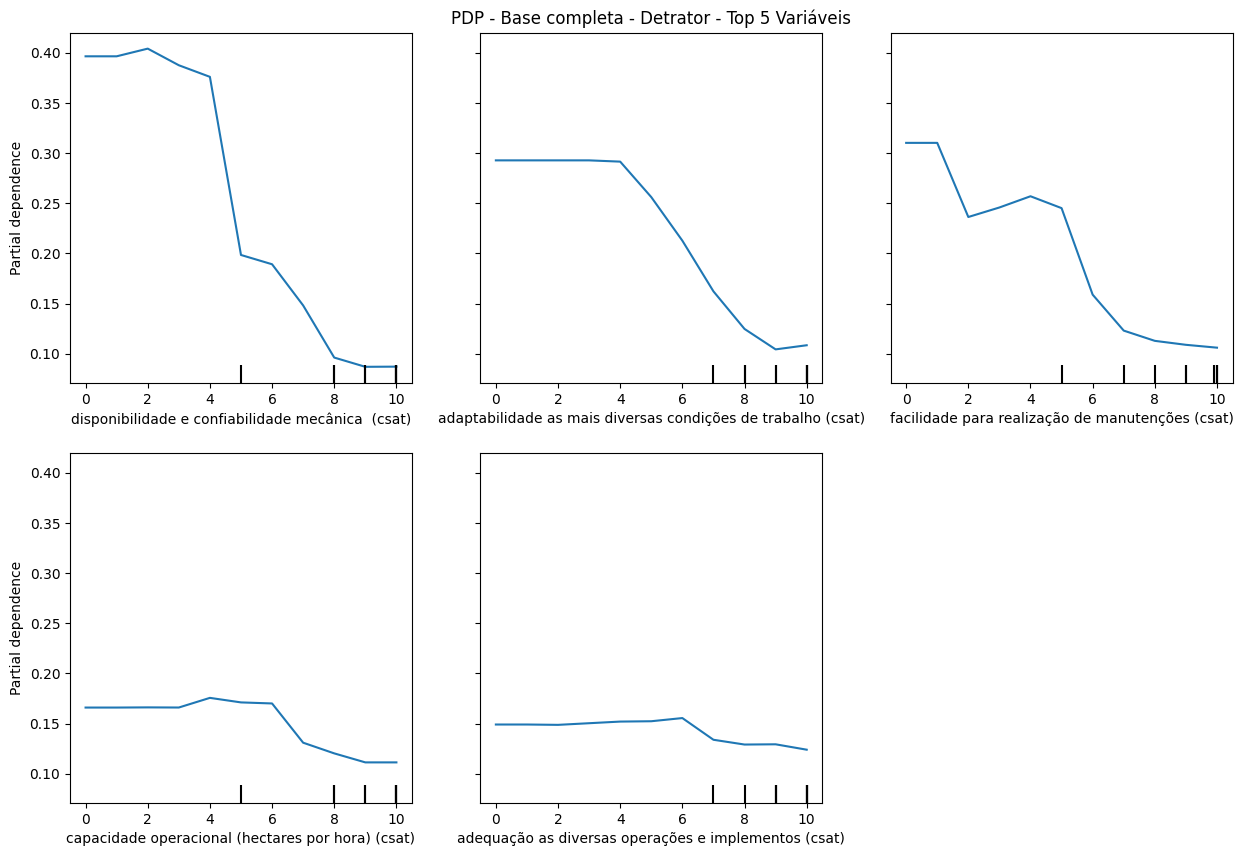

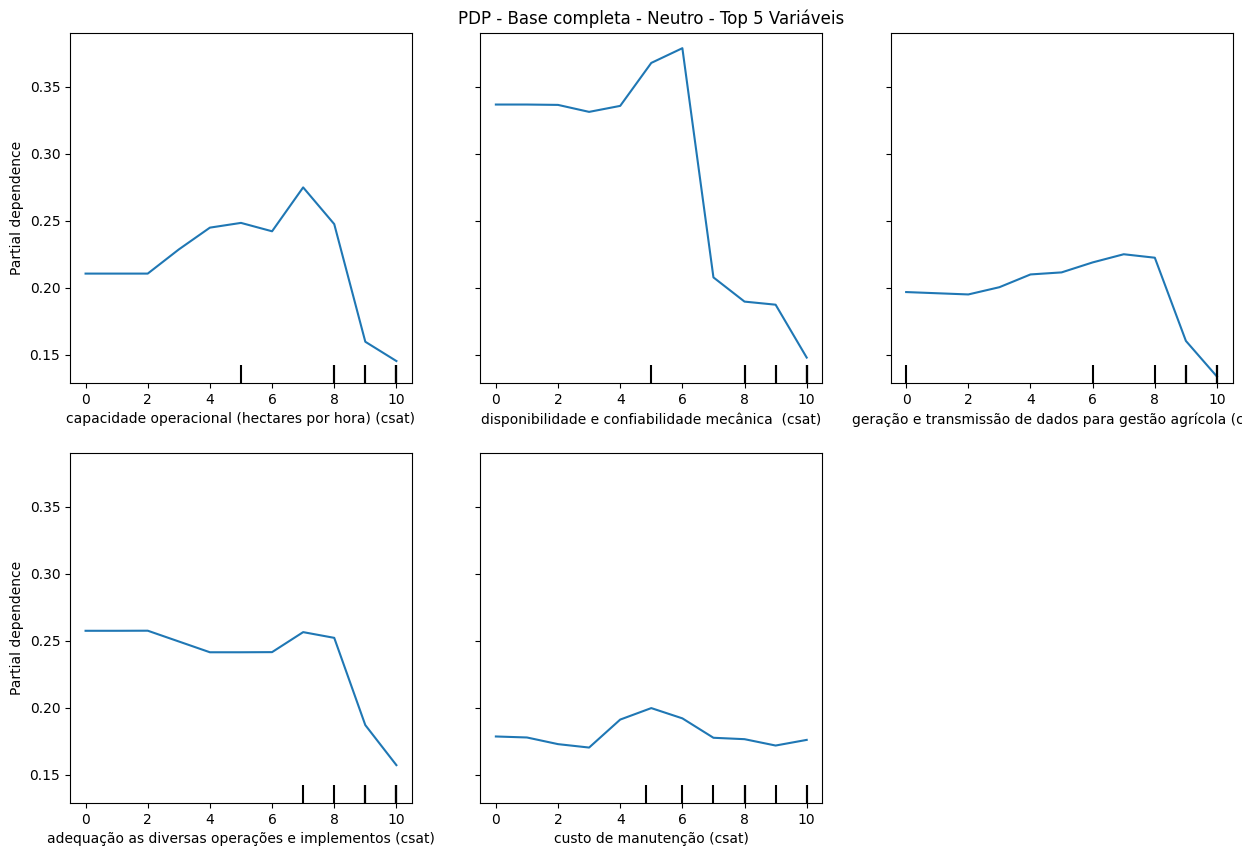

In [32]:
# Base completa
model_detrator, X_detrator_train, top_detrator_completo, report_detrator  = random_forest_train_model(X, y_detrator)
model_neutro, X_neutro_train, top_neutro_completo, report_neutro = random_forest_train_model(X, y_neutro)

plot_pdp_for_top_features(model_detrator, X_detrator_train, top_detrator_completo, 'Base completa - Detrator')
plot_pdp_for_top_features(model_neutro, X_neutro_train, top_neutro_completo, 'Base completa - Neutro')

##### Análise por região

/home/kemuel/.local/share/virtualenvs/data-science-university-6_sN-WKk/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/kemuel/.local/share/virtualenvs/data-science-university-6_sN-WKk/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/kemuel/.local/share/virtualenvs/data-science-university-6_sN-WKk/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



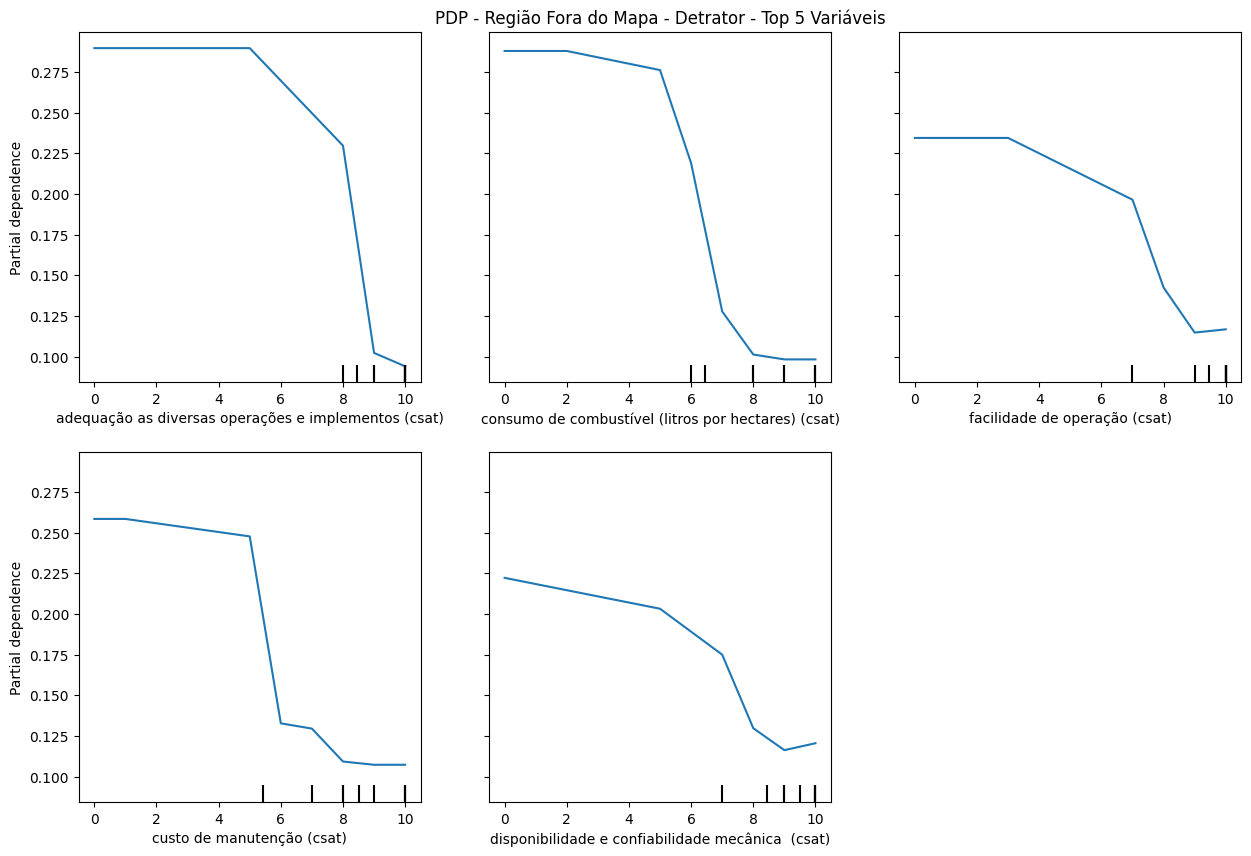

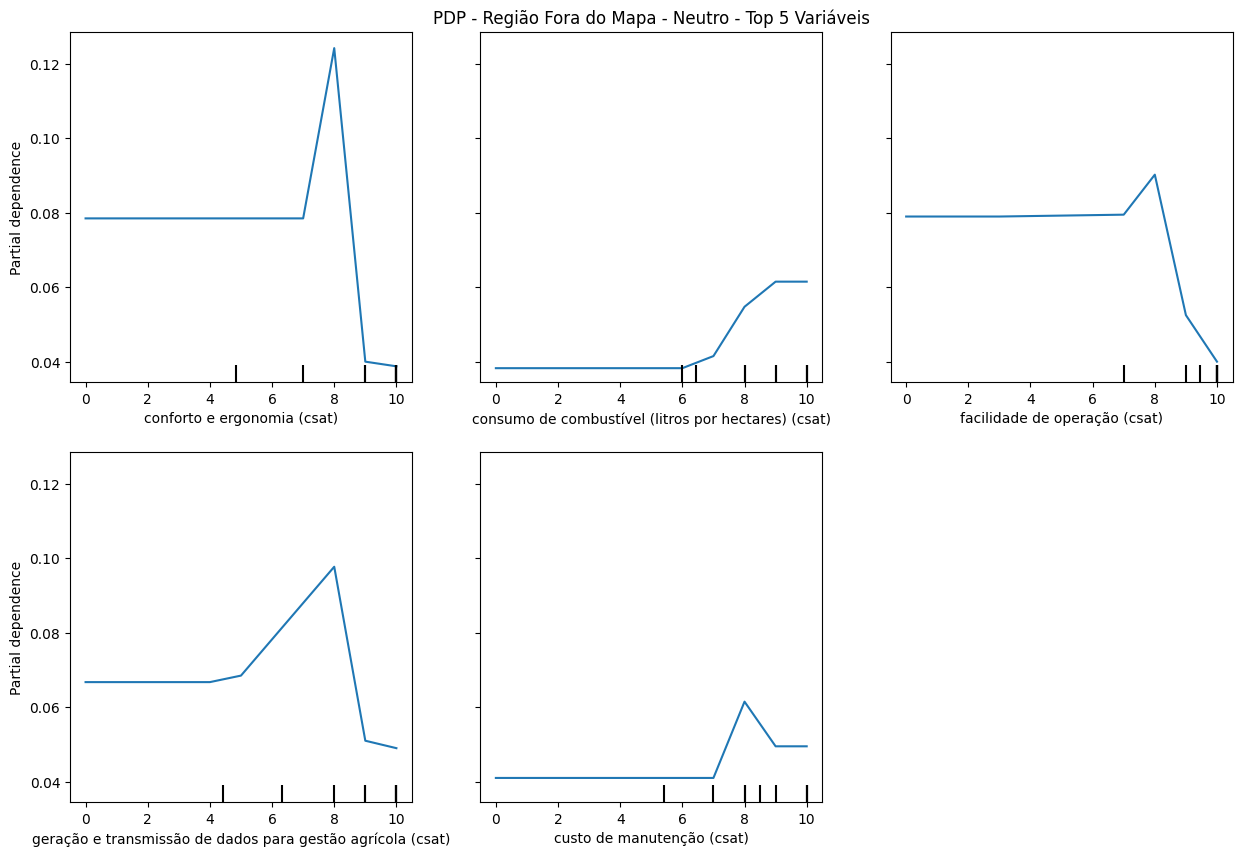

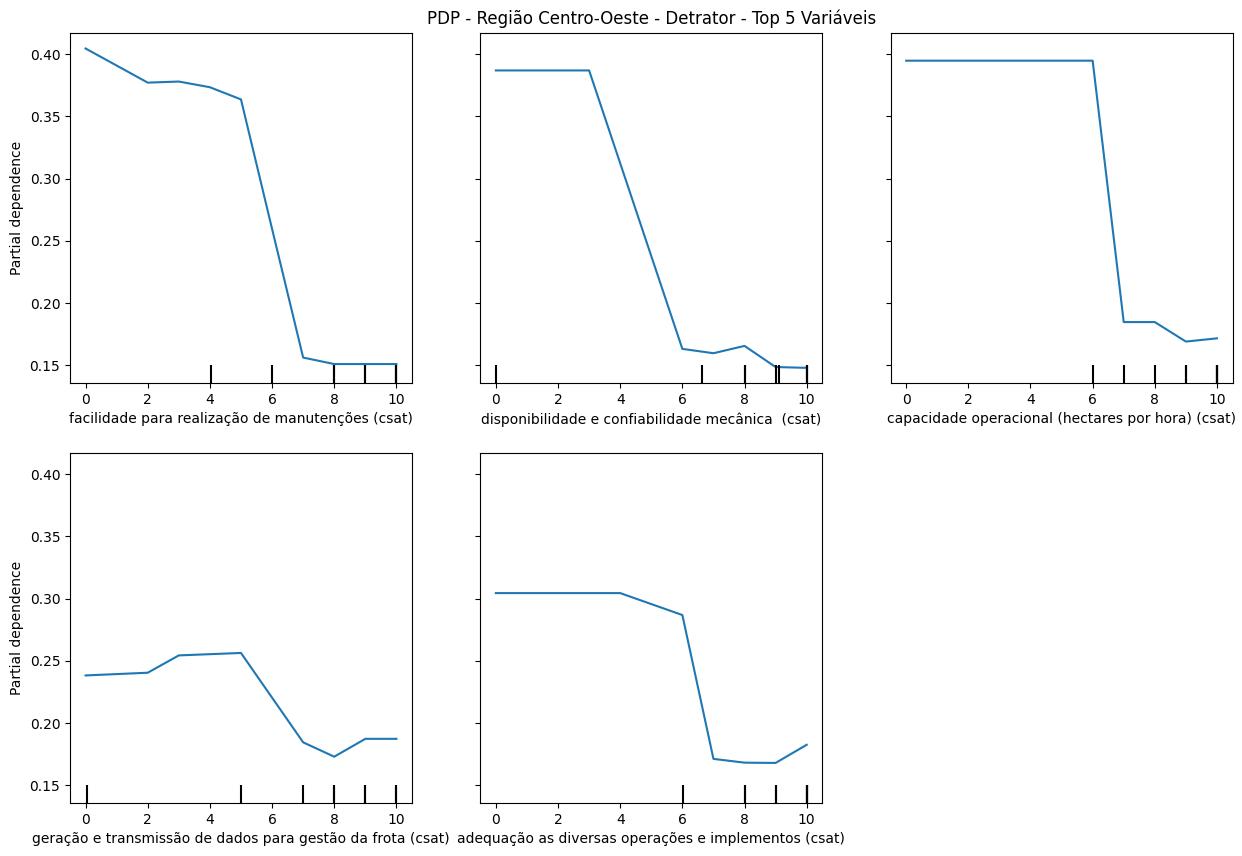

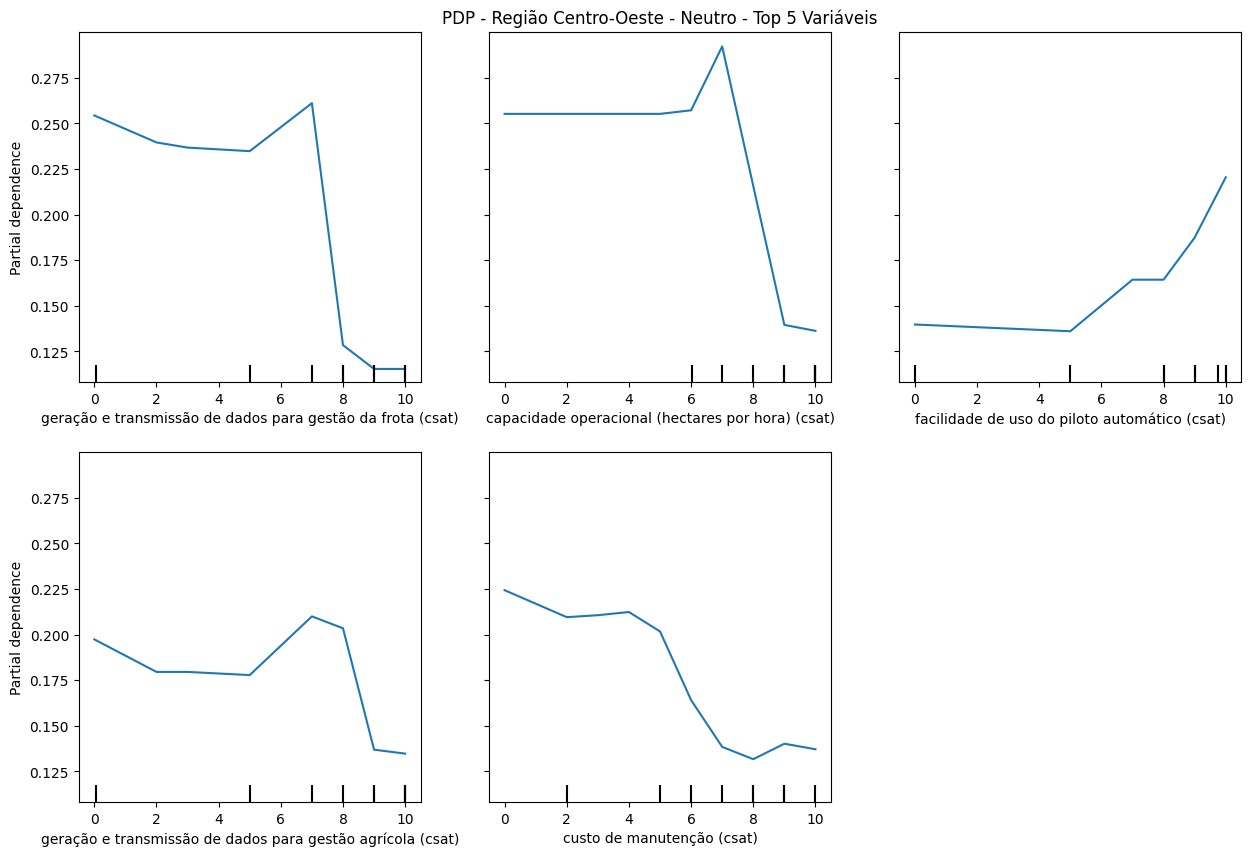

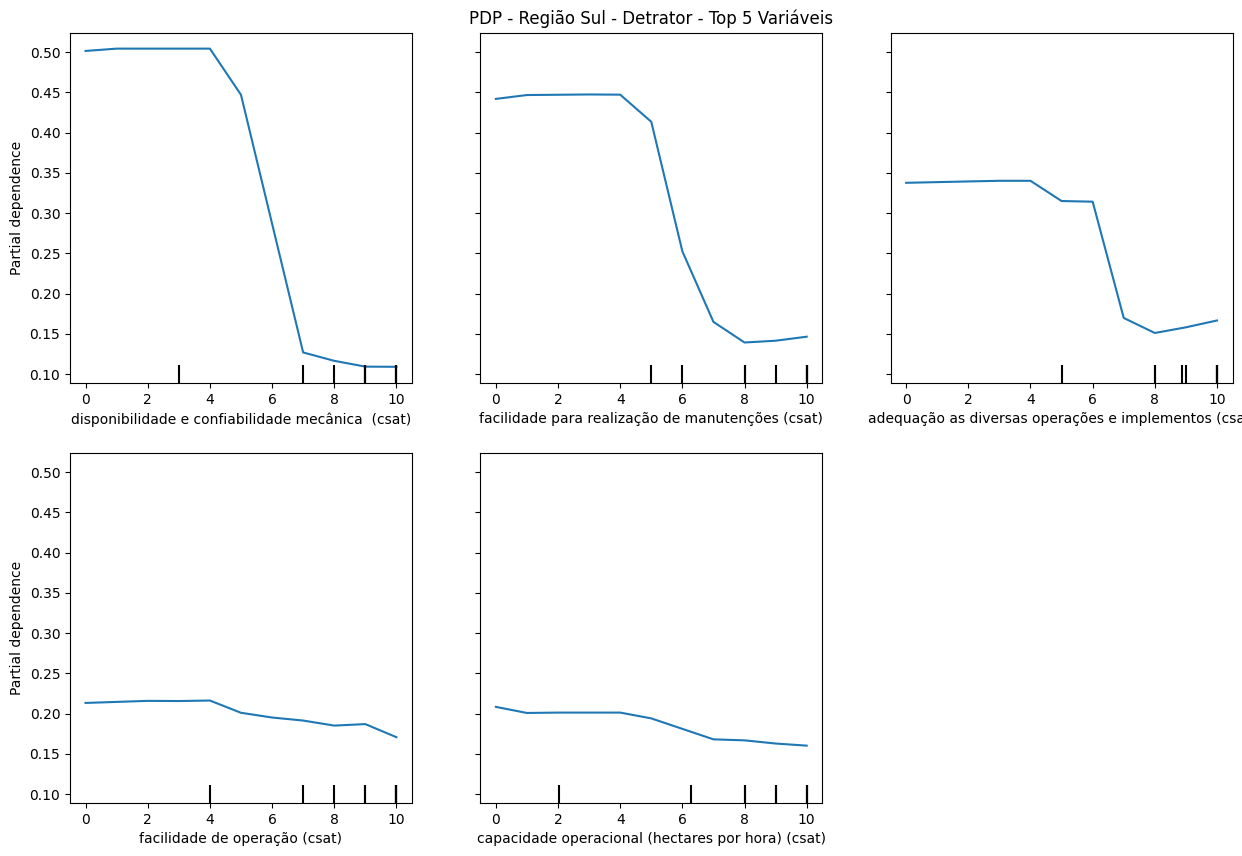

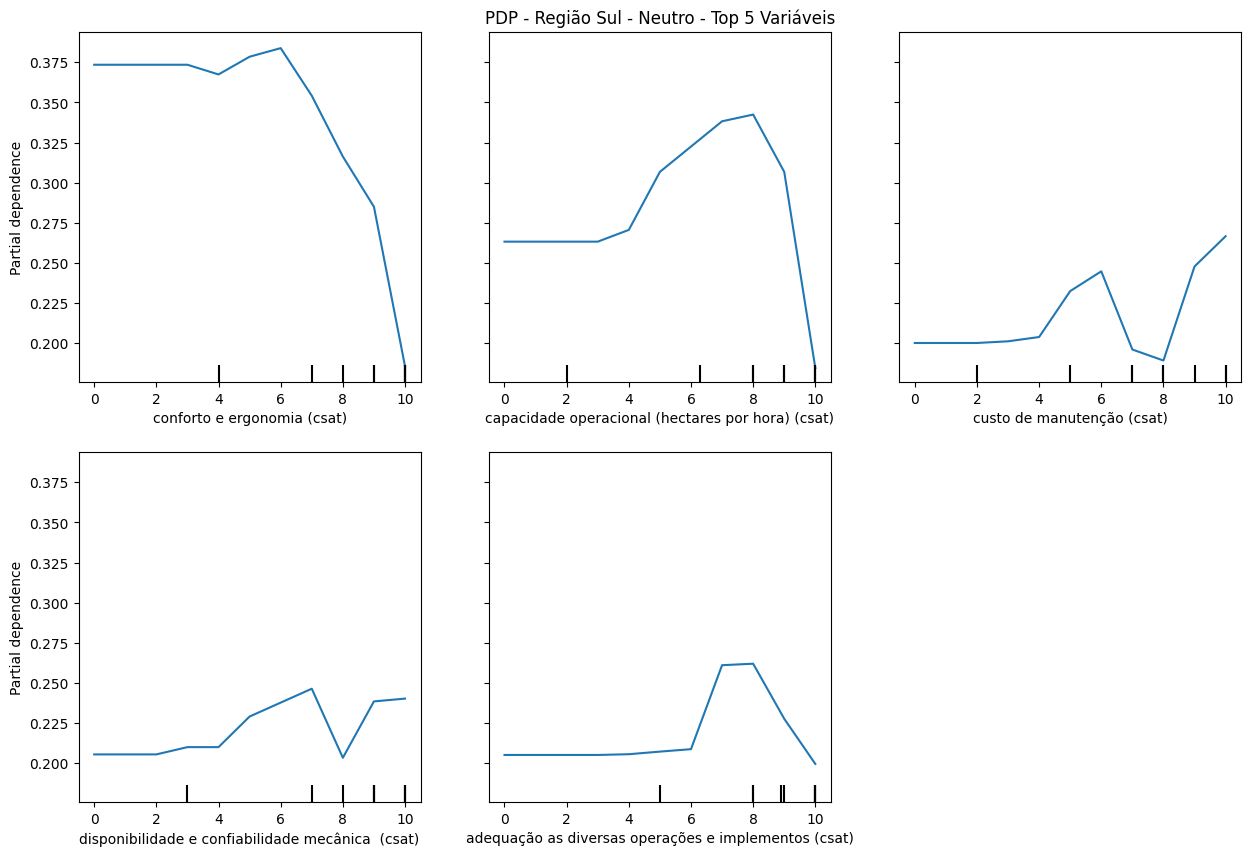

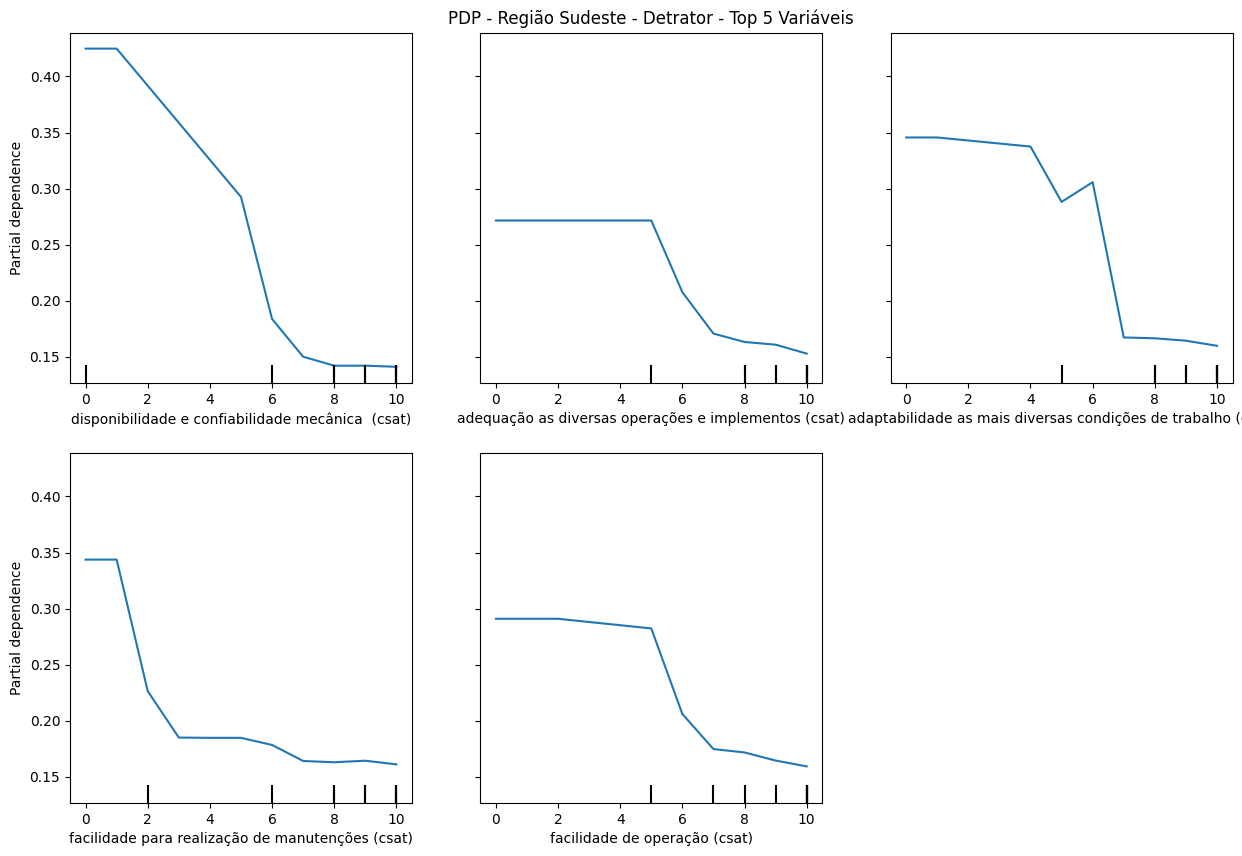

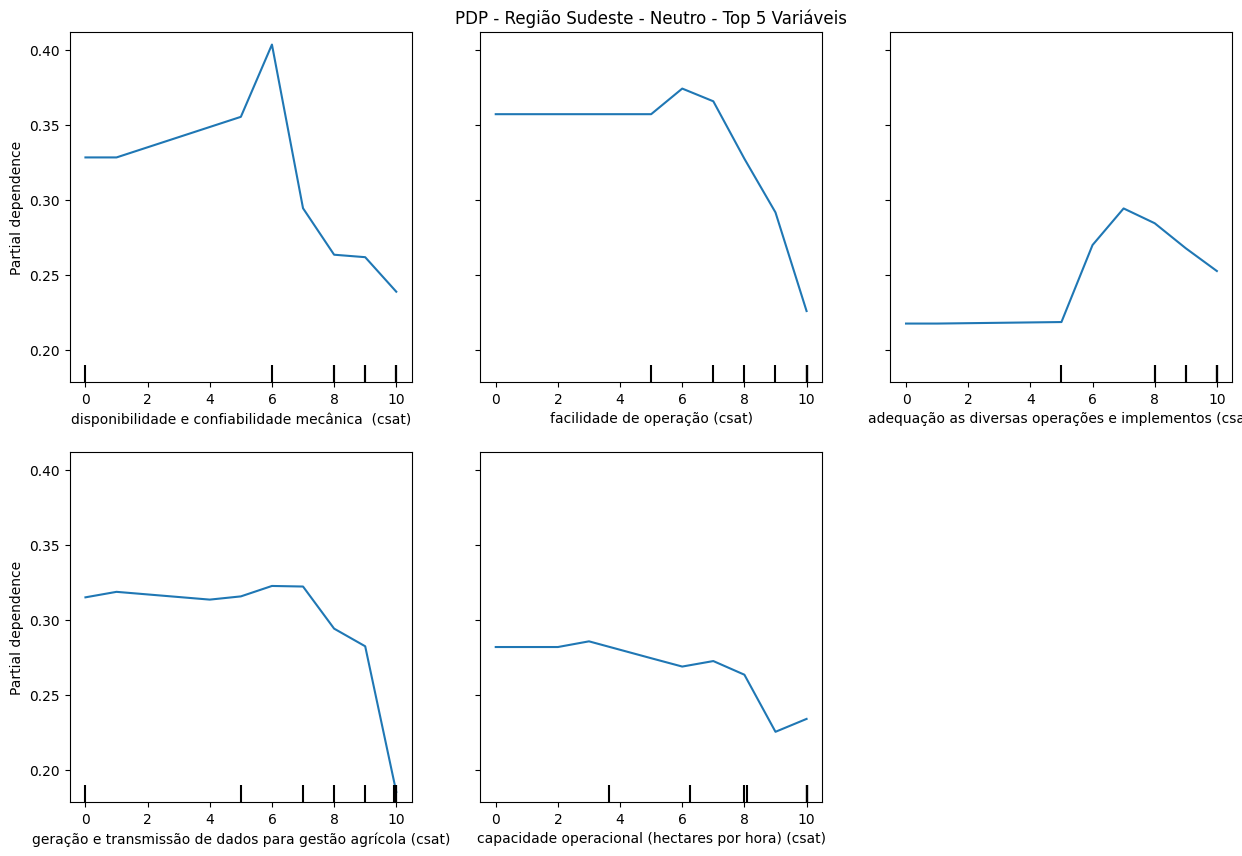

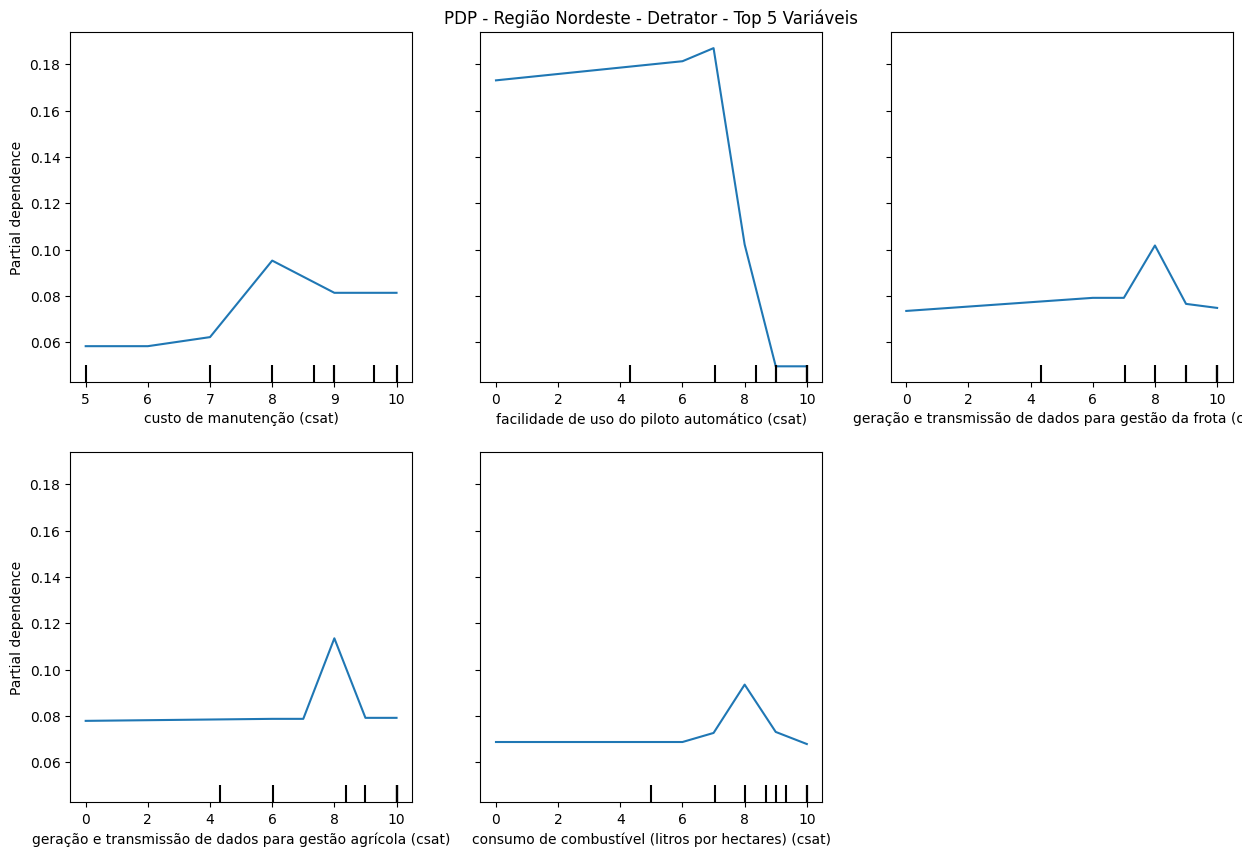

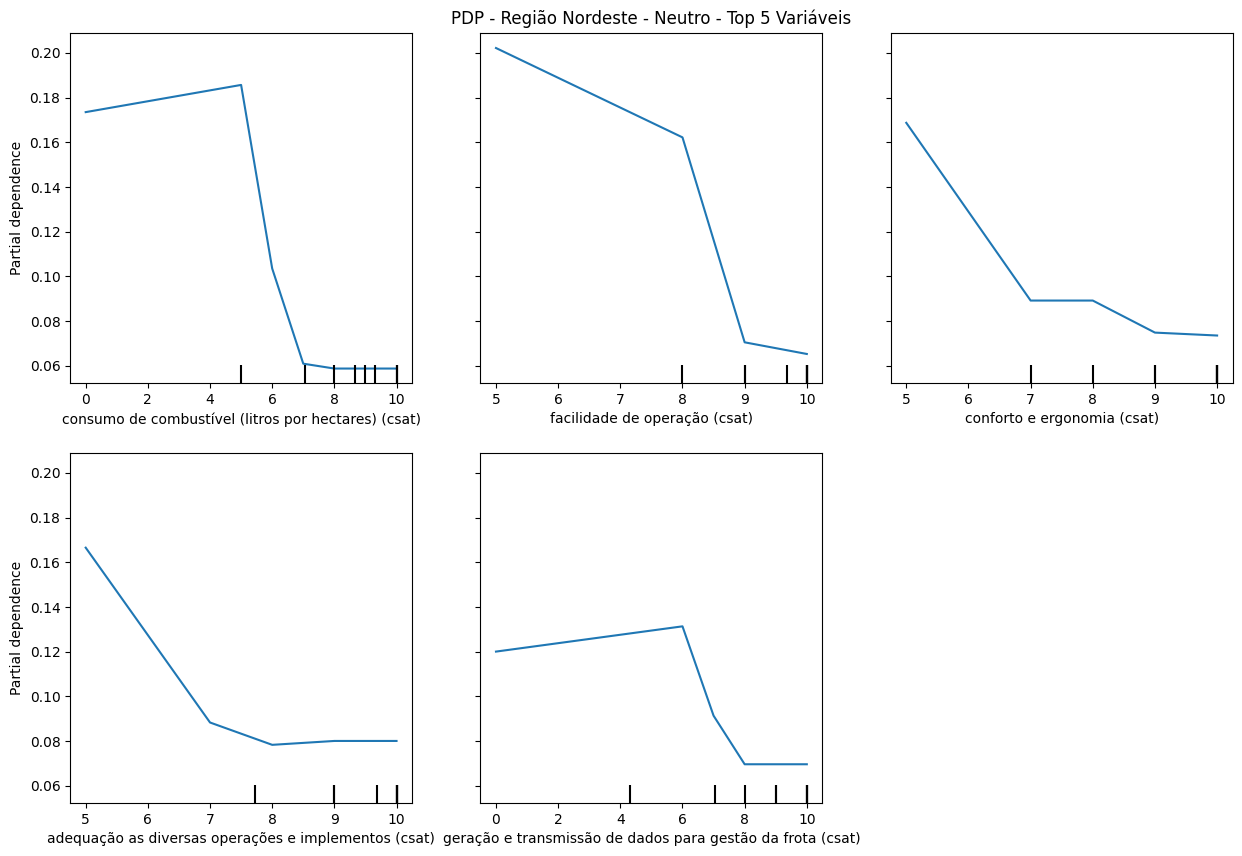

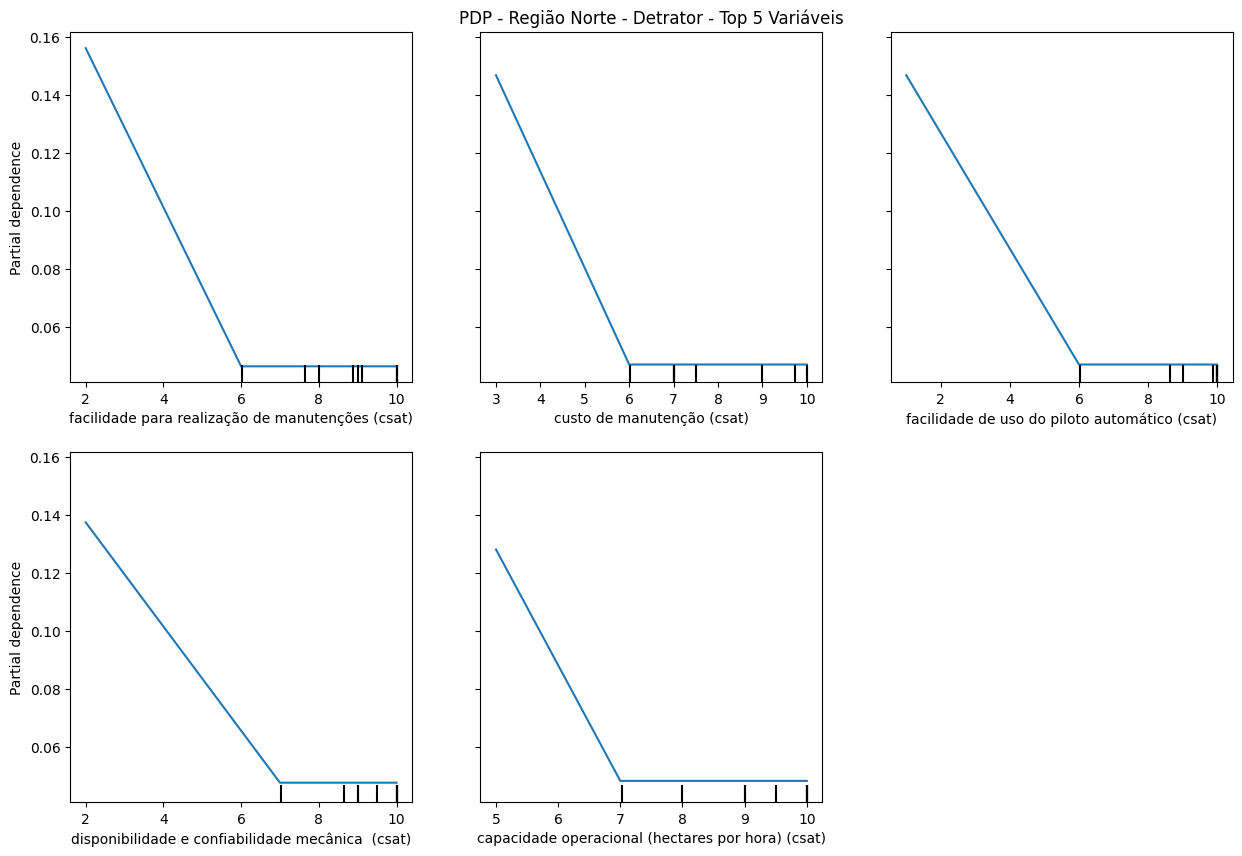

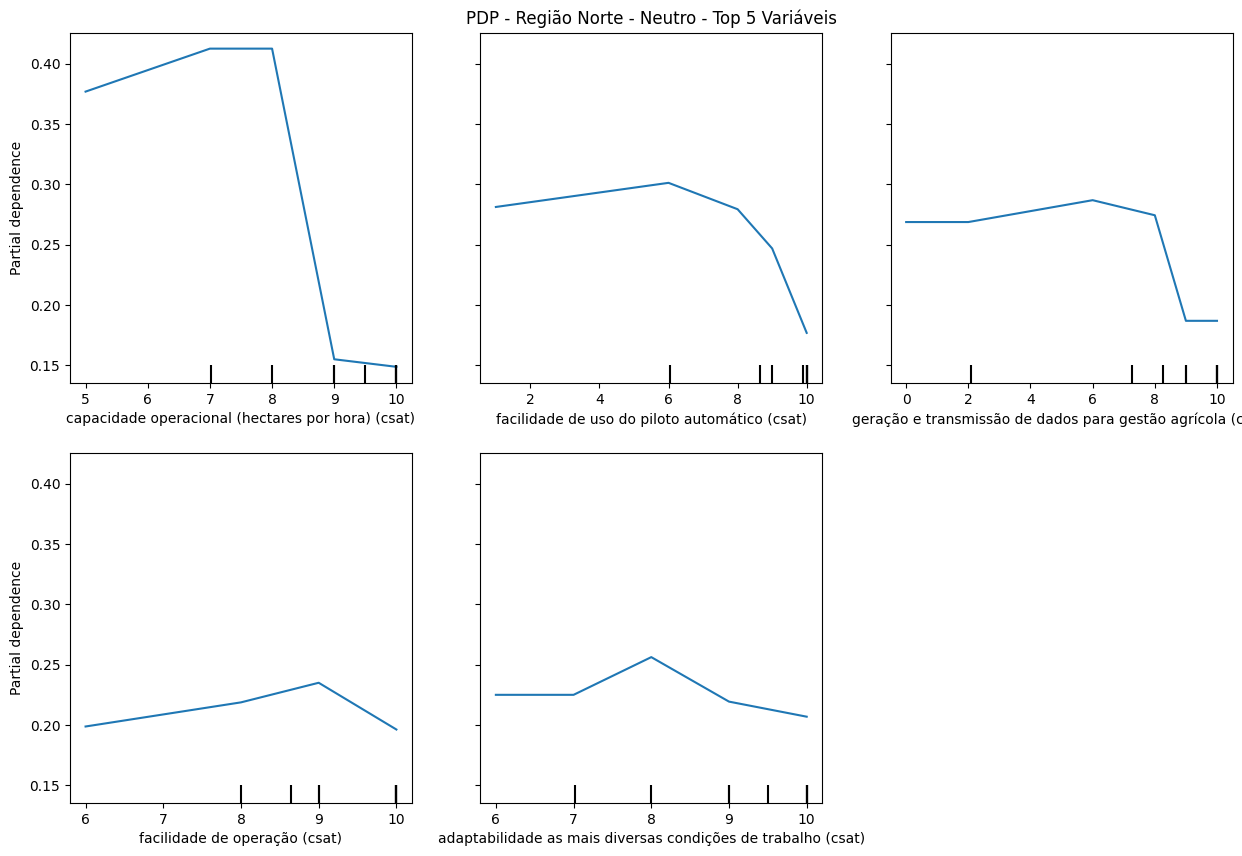

In [33]:
# Por região
for regiao in regioes:
  df_regiao = df_filt_grupo[df_filt_grupo['regiao'] == regiao]
  X_regiao = df_regiao[columns_to_filter]
  y_detrator_regiao = df_regiao['target'].apply(lambda x: 1 if x == "Detratores" else 0)
  y_neutro_regiao = df_regiao['target'].apply(lambda x: 1 if x == "Neutro" else 0)

  model_detrator_regiao, X_detrator_regiao_train, top_detrator_regiao, resultados[f'Região {regiao} - Detrator'] = random_forest_train_model(X_regiao, y_detrator_regiao)
  model_neutro_regiao, X_neutro_regiao_train, top_neutro_regiao, resultados[f'Região {regiao} - Neutro'] = random_forest_train_model(X_regiao, y_neutro_regiao)

  plot_pdp_for_top_features(model_detrator_regiao, X_detrator_regiao_train, top_detrator_regiao, f'Região {regiao} - Detrator')
  plot_pdp_for_top_features(model_neutro_regiao, X_neutro_regiao_train, top_neutro_regiao, f'Região {regiao} - Neutro')

##### Análise por período de pesquisa

Período  3 a 6 M ignorado devido ao número insuficiente de amostras (1)
Período  6 a 12 M ignorado devido ao número insuficiente de amostras (1)


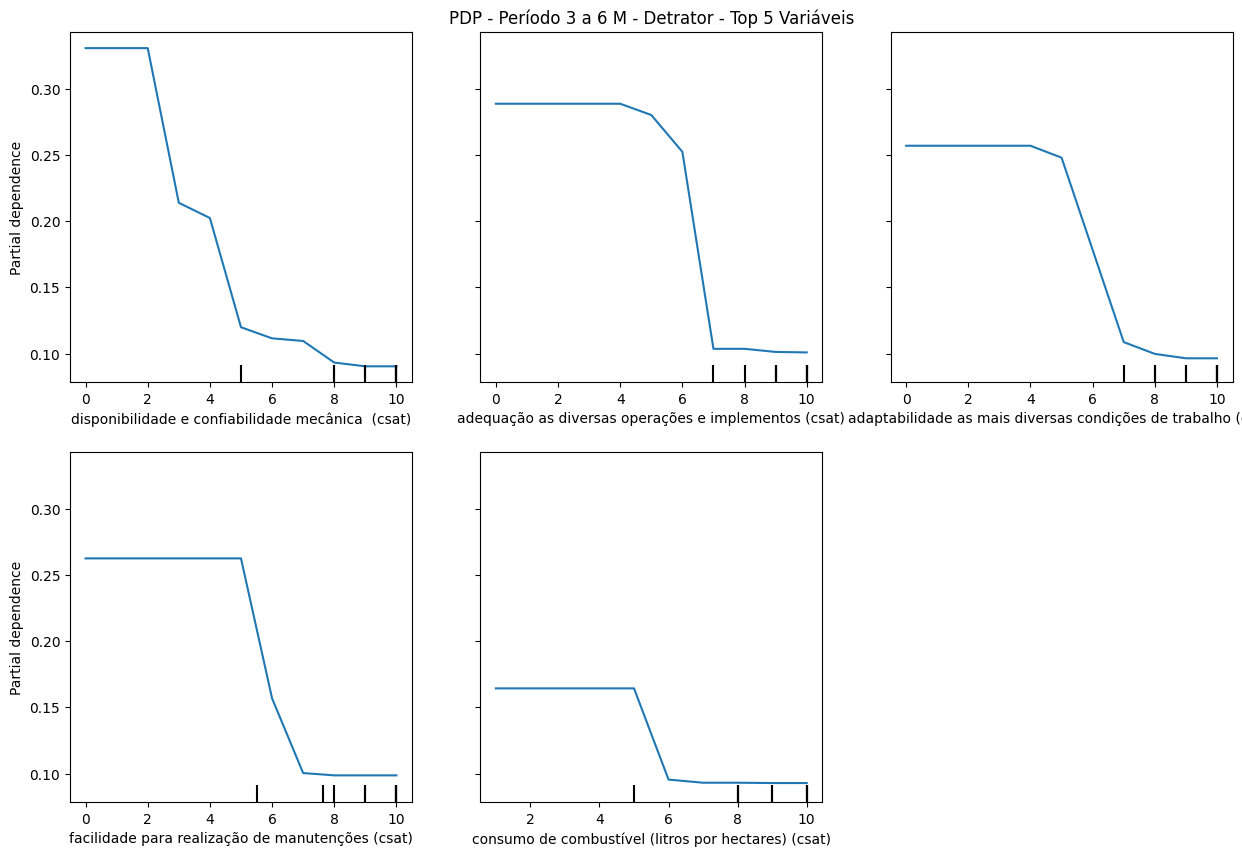

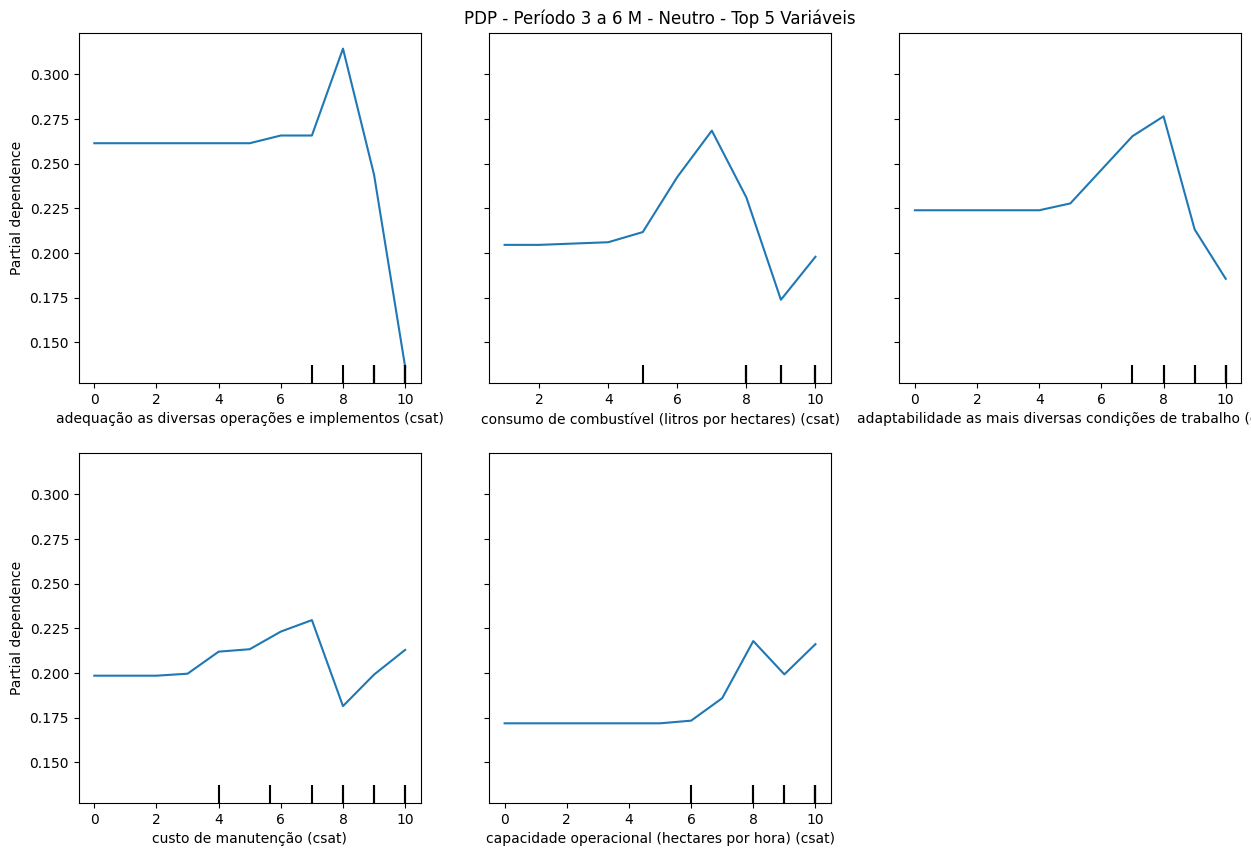

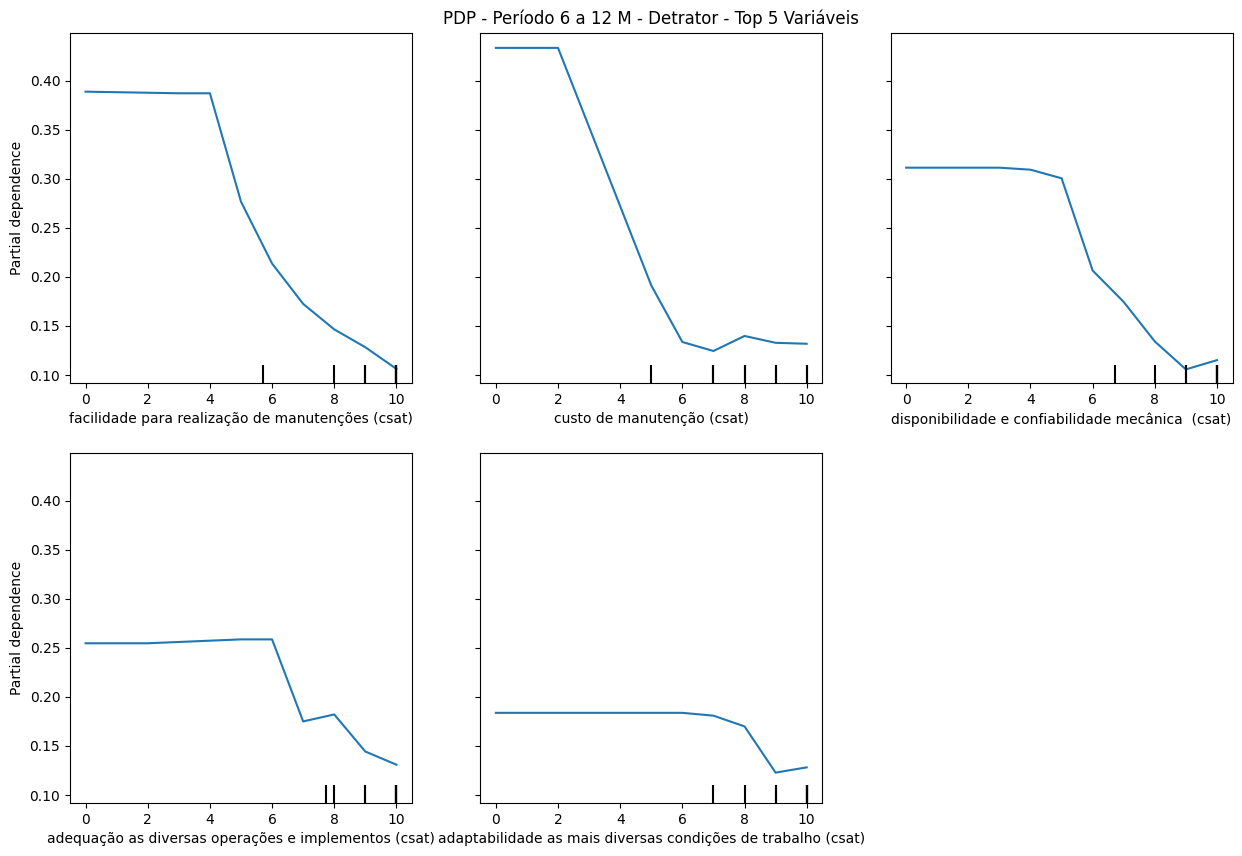

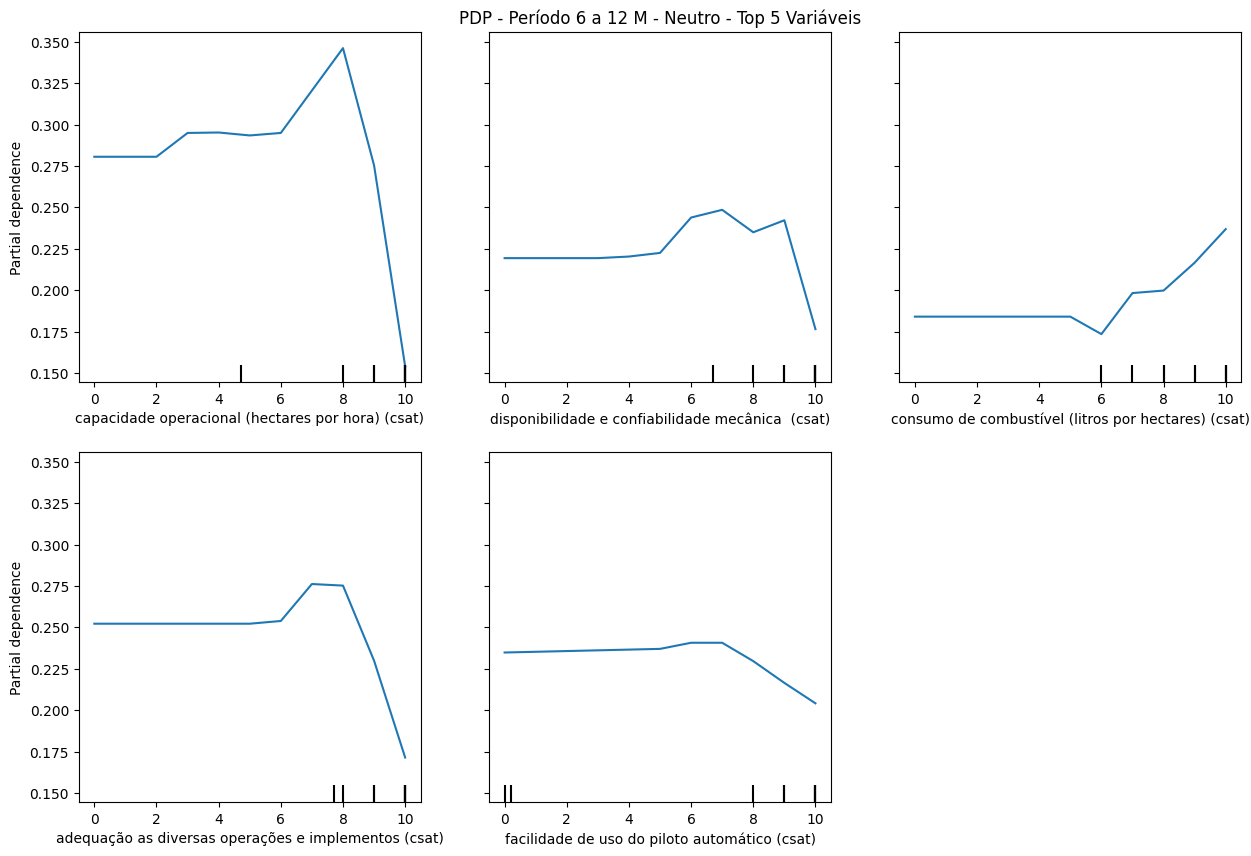

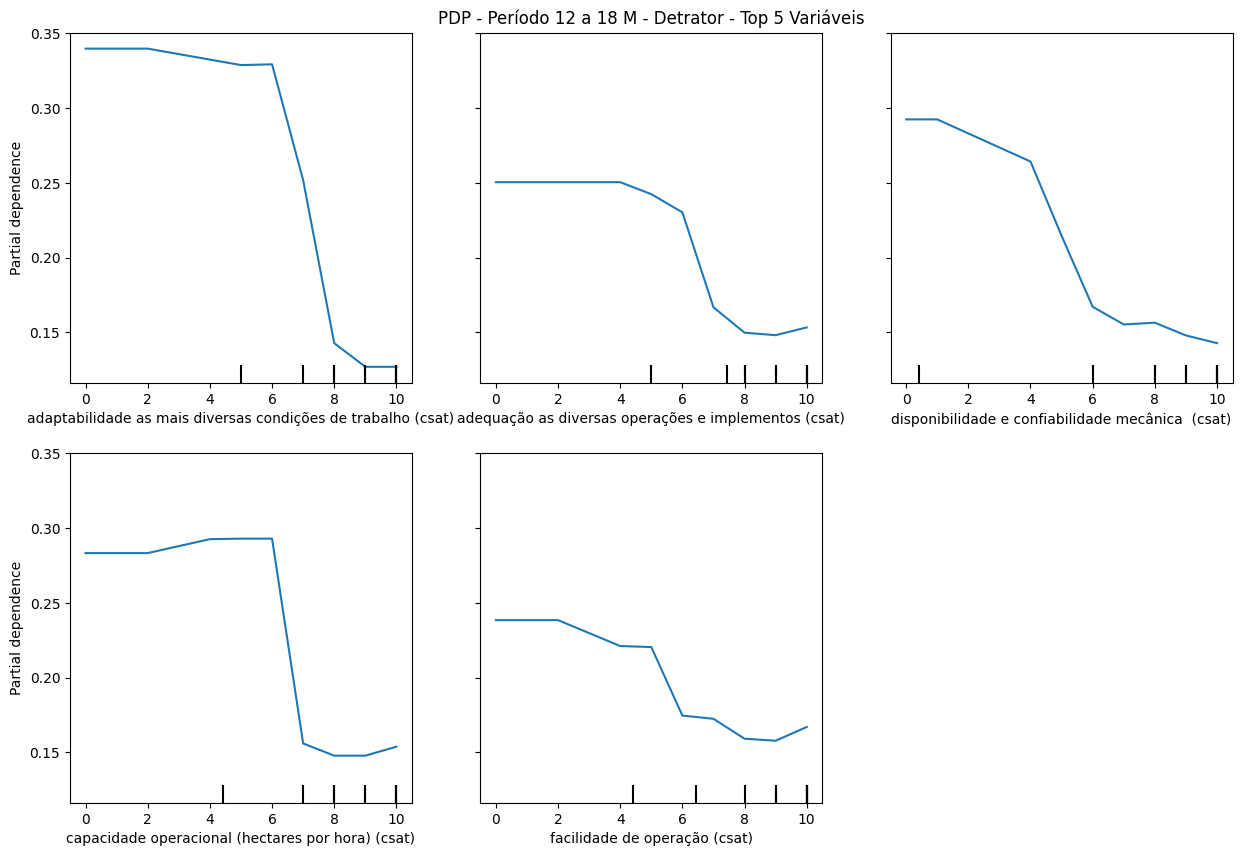

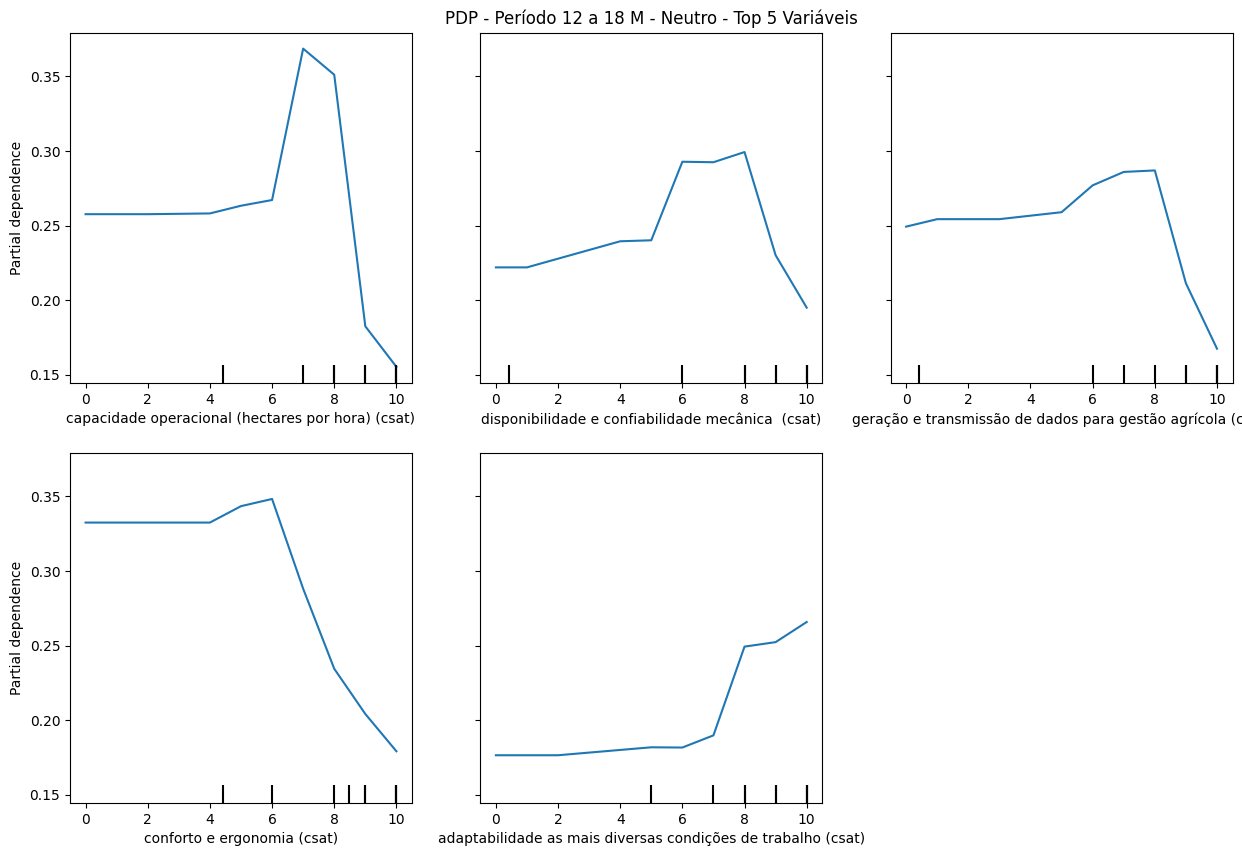

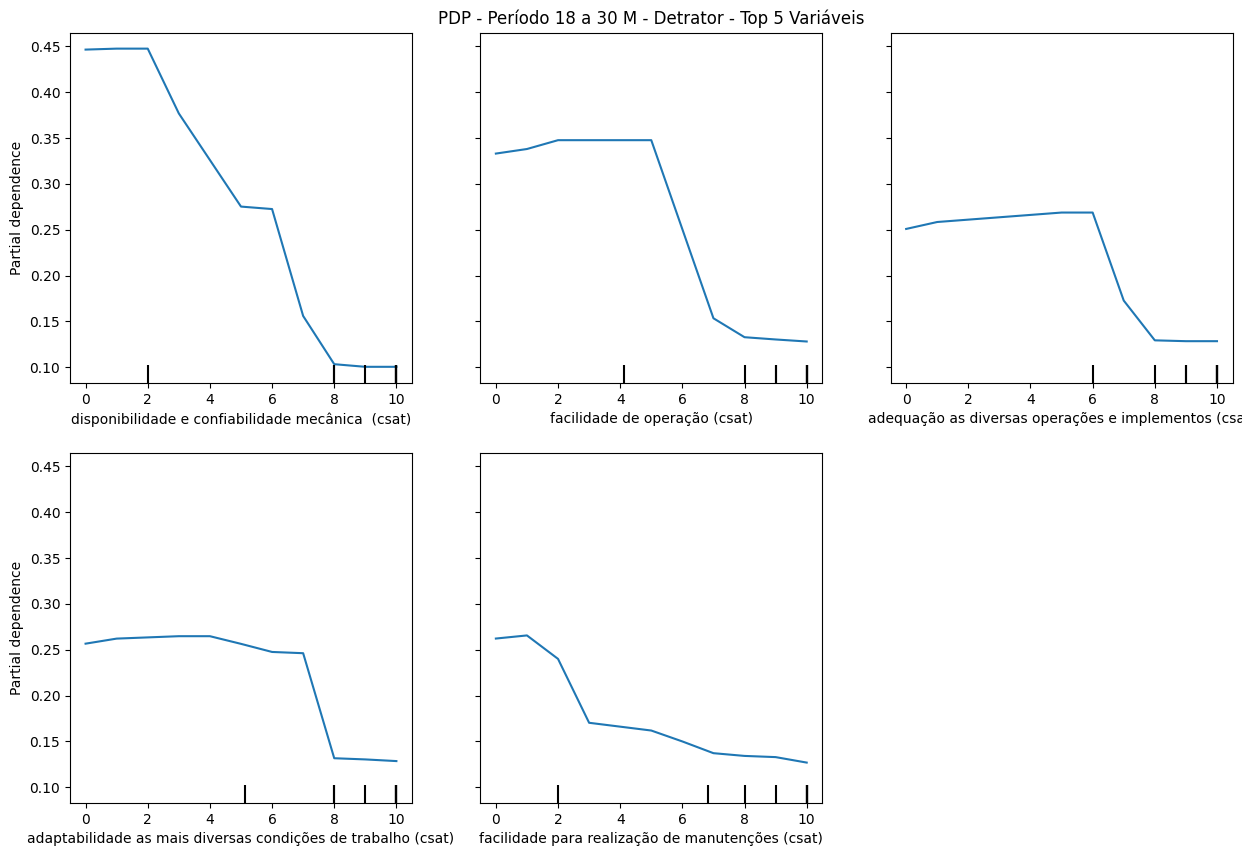

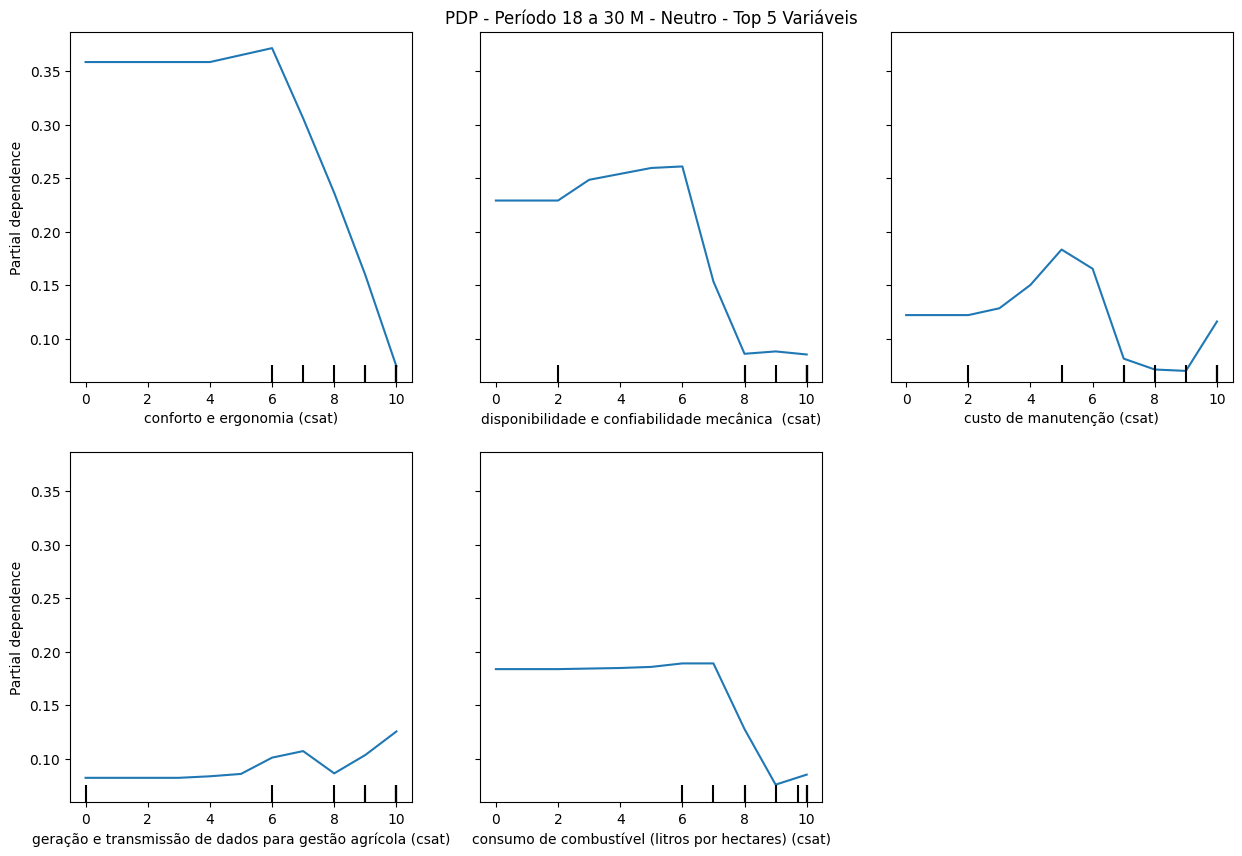

In [34]:
for periodo in periodos:
  df_periodo = df_filt_grupo[df_filt_grupo['Periodo de Pesquisa'] == periodo]
  if len(df_periodo) < 2:
    print(f"Período {periodo} ignorado devido ao número insuficiente de amostras ({len(df_periodo)})")
    continue

  X_periodo = df_periodo[columns_to_filter]
  y_detrator_periodo = df_periodo['target'].apply(lambda x: 1 if x == "Detratores" else 0)
  y_neutro_periodo = df_periodo['target'].apply(lambda x: 1 if x == "Neutro" else 0)

  try:
    model_detrator_periodo, X_detrator_periodo_train, top_detrator_periodo, resultados[f'Período {periodo} - Detrator'] = random_forest_train_model(X_periodo, y_detrator_periodo)
    model_neutro_periodo, X_neutro_periodo_train, top_neutro_periodo, resultados[f'Período {periodo} - Neutro'] = random_forest_train_model(X_periodo, y_neutro_periodo)
  
    plot_pdp_for_top_features(model_detrator_periodo, X_detrator_periodo_train, top_detrator_periodo, f'Período {periodo} - Detrator')
    plot_pdp_for_top_features(model_neutro_periodo, X_neutro_periodo_train, top_neutro_periodo, f'Período {periodo} - Neutro')
  except ValueError as e:
    print(f"Erro ao treinar modelo para o período {periodo}: {e}")